In [145]:
print("test")

test


In [146]:
%pip install requests
%pip install zeep
%pip install openml
%pip install seaborn
%pip install plotly
%pip install geodatasets 
%pip install folium 



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [147]:
import requests
from pprint import pprint
import pandas as pd
from zeep import Client
import logging
import openml
import sqlite3
import xml.etree.ElementTree as ET
import math
import folium



# API Number of motor vehicles 

Below you can find the end points. We will use the TypedDataSet end point.
```
{
  "odata.metadata":"https://opendata.cbs.nl/ODataApi/OData/85235NED/$metadata","value":[
    {
      "name":"TableInfos","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/TableInfos"
    },{
      "name":"UntypedDataSet","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/UntypedDataSet"
    },{
      "name":"TypedDataSet","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/TypedDataSet"
    },{
      "name":"DataProperties","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/DataProperties"
    },{
      "name":"CategoryGroups","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/CategoryGroups"
    },{
      "name":"RegioS","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/RegioS"
    },{
      "name":"Perioden","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/Perioden"
    }
  ]
}
```

In [148]:
url = "https://opendata.cbs.nl/ODataApi/odata/85235NED/TypedDataSet"
response= requests.get(url)
users= response.json()
print(users)



{'odata.metadata': 'https://opendata.cbs.nl/ODataApi/OData/85235NED/$metadata#Cbs.OData.WebAPI.TypedDataSet', 'value': [{'ID': 0, 'RegioS': 'NL01  ', 'Perioden': '2019JJ00', 'TotaalWegvoertuigen_1': 11372065, 'TotaalMotorvoertuigen_2': 10199679, 'TotaalPersonenautoS_3': 8442982, 'PersonenautoSRelatief_4': 489, 'InBezitNatuurlijkePersonen_5': 7452085, 'InBezitNatuurlijkePersonenRelatief_6': 431, 'TotaalBedrijfsvoertuigen_7': 2283037, 'TotaalBedrijfsmotorvoertuigen_8': 1110651, 'TotaalAanhangwagensEnOpleggers_9': 1172386, 'TotaalBedrijfsmotorvoertuigen_10': 1110651, 'Bestelauto_11': 903005, 'VrachtautoExclTrekkerVoorOplegger_12': 61652, 'TrekkerVoorOplegger_13': 78788, 'SpeciaalVoertuig_14': 57693, 'Bus_15': 9513, 'TotaalAanhangwagensEnOpleggers_16': 1172386, 'Aanhangwagen_17': 1008412, 'Oplegger_18': 163974, 'TotaalMotorfietsen_19': 646046, 'MotorfietsenRelatief_20': 37}, {'ID': 1, 'RegioS': 'NL01  ', 'Perioden': '2020JJ00', 'TotaalWegvoertuigen_1': 11567203, 'TotaalMotorvoertuigen_2': 

##### In order to make the output above more readable print the following cell

In [149]:
#this will print the typed dataset in json format, so name value pairs
url = "https://opendata.cbs.nl/ODataApi/odata/85235NED/TypedDataSet"
posts = requests.get(url).json()

pprint (posts)
print("test")




{'odata.metadata': 'https://opendata.cbs.nl/ODataApi/OData/85235NED/$metadata#Cbs.OData.WebAPI.TypedDataSet',
 'value': [{'Aanhangwagen_17': 1008412,
            'Bestelauto_11': 903005,
            'Bus_15': 9513,
            'ID': 0,
            'InBezitNatuurlijkePersonenRelatief_6': 431,
            'InBezitNatuurlijkePersonen_5': 7452085,
            'MotorfietsenRelatief_20': 37,
            'Oplegger_18': 163974,
            'Perioden': '2019JJ00',
            'PersonenautoSRelatief_4': 489,
            'RegioS': 'NL01  ',
            'SpeciaalVoertuig_14': 57693,
            'TotaalAanhangwagensEnOpleggers_16': 1172386,
            'TotaalAanhangwagensEnOpleggers_9': 1172386,
            'TotaalBedrijfsmotorvoertuigen_10': 1110651,
            'TotaalBedrijfsmotorvoertuigen_8': 1110651,
            'TotaalBedrijfsvoertuigen_7': 2283037,
            'TotaalMotorfietsen_19': 646046,
            'TotaalMotorvoertuigen_2': 10199679,
            'TotaalPersonenautoS_3': 8442982,
   

In [150]:
# select columns by first selecting the "value" key from json format
# then specify the specific columns
dfposts = pd.DataFrame(posts["value"])[['Aanhangwagen_17',
            'Bestelauto_11',
            'Bus_15',
            'ID',
            'InBezitNatuurlijkePersonenRelatief_6',
            'InBezitNatuurlijkePersonen_5',
            'MotorfietsenRelatief_20',
            'Oplegger_18',
            'Perioden',
            'PersonenautoSRelatief_4',
            'RegioS',
            'SpeciaalVoertuig_14',
            'TotaalAanhangwagensEnOpleggers_16',
            'TotaalAanhangwagensEnOpleggers_9',
            'TotaalBedrijfsmotorvoertuigen_10',
            'TotaalBedrijfsmotorvoertuigen_8',
            'TotaalBedrijfsvoertuigen_7',
            'TotaalMotorfietsen_19',
            'TotaalMotorvoertuigen_2',
            'TotaalPersonenautoS_3',
            'TotaalWegvoertuigen_1',
            'TrekkerVoorOplegger_13',
            'VrachtautoExclTrekkerVoorOplegger_12']]
dfposts.head()



,Aanhangwagen_17,Bestelauto_11,Bus_15,ID,InBezitNatuurlijkePersonenRelatief_6,InBezitNatuurlijkePersonen_5,MotorfietsenRelatief_20,Oplegger_18,Perioden,PersonenautoSRelatief_4,...,TotaalAanhangwagensEnOpleggers_9,TotaalBedrijfsmotorvoertuigen_10,TotaalBedrijfsmotorvoertuigen_8,TotaalBedrijfsvoertuigen_7,TotaalMotorfietsen_19,TotaalMotorvoertuigen_2,TotaalPersonenautoS_3,TotaalWegvoertuigen_1,TrekkerVoorOplegger_13,VrachtautoExclTrekkerVoorOplegger_12
0,1008412,903005,9513,0,431,7452085,37,163974,2019JJ00,489,...,1172386,1110651,1110651,2283037,646046,10199679,8442982,11372065,78788,61652
1,1023980,927251,9699,1,434,7548770,38,168502,2020JJ00,493,...,1192482,1135943,1135943,2328425,654387,10374721,8584391,11567203,80118,61746
2,1029636,945433,9050,2,440,7683236,38,170014,2021JJ00,497,...,1199650,1151740,1151740,2351390,666597,10504756,8686419,11704406,79932,60831
3,1051486,974792,8532,3,444,7803950,39,177294,2022JJ00,502,...,1228780,1182857,1182857,2411637,677787,10688353,8827709,11917133,82436,60867
4,1069827,989841,8756,4,440,7842473,39,185262,2023JJ00,501,...,1255089,1201061,1201061,2456150,690724,10808892,8917107,12063981,85679,60811


In [151]:
dfposts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Aanhangwagen_17                       119 non-null    int64 
 1   Bestelauto_11                         119 non-null    int64 
 2   Bus_15                                119 non-null    int64 
 3   ID                                    119 non-null    int64 
 4   InBezitNatuurlijkePersonenRelatief_6  119 non-null    int64 
 5   InBezitNatuurlijkePersonen_5          119 non-null    int64 
 6   MotorfietsenRelatief_20               119 non-null    int64 
 7   Oplegger_18                           119 non-null    int64 
 8   Perioden                              119 non-null    object
 9   PersonenautoSRelatief_4               119 non-null    int64 
 10  RegioS                                119 non-null    object
 11  SpeciaalVoertuig_14             

By retrieving this info, we do not need to think about how to impute missing values (because there are no NaN values)

In [152]:
dfposts.describe(include="all")

,Aanhangwagen_17,Bestelauto_11,Bus_15,ID,InBezitNatuurlijkePersonenRelatief_6,InBezitNatuurlijkePersonen_5,MotorfietsenRelatief_20,Oplegger_18,Perioden,PersonenautoSRelatief_4,...,TotaalAanhangwagensEnOpleggers_9,TotaalBedrijfsmotorvoertuigen_10,TotaalBedrijfsmotorvoertuigen_8,TotaalBedrijfsvoertuigen_7,TotaalMotorfietsen_19,TotaalMotorvoertuigen_2,TotaalPersonenautoS_3,TotaalWegvoertuigen_1,TrekkerVoorOplegger_13,VrachtautoExclTrekkerVoorOplegger_12
count,1.190000e+02,1.190000e+02,119.000000,119.000000,119.000000,1.190000e+02,119.000000,119.00000,119,119.000000,...,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,119.000000,1.190000e+02,1.190000e+02,1.190000e+02,119.000000,119.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019JJ00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.854826e+05,1.713652e+05,1599.781513,59.000000,458.327731,1.371150e+06,41.445378,31314.02521,NaN,531.352941,...,2.167967e+05,2.084077e+05,2.084077e+05,4.252043e+05,119986.058824,1.885717e+06,1.557323e+06,2.102513e+06,14653.285714,10856.092437
std,2.359257e+05,2.222785e+05,2209.500400,34.496377,43.597953,1.791485e+06,6.256790,41848.47121,NaN,92.283424,...,2.769861e+05,2.701247e+05,2.701247e+05,5.464519e+05,155689.531752,2.460088e+06,2.034669e+06,2.735181e+06,19137.159198,14132.059518
min,2.181000e+04,2.361800e+04,51.000000,0.000000,375.000000,1.728080e+05,30.000000,2359.00000,NaN,421.000000,...,2.416900e+04,2.922200e+04,2.922200e+04,6.392300e+04,15091.000000,2.477690e+05,2.013010e+05,2.824700e+05,1414.000000,1156.000000
25%,6.106750e+04,4.746650e+04,367.000000,29.500000,422.500000,3.145290e+05,36.000000,4977.00000,NaN,494.500000,...,6.587250e+04,5.816600e+04,5.816600e+04,1.226150e+05,30465.500000,4.397930e+05,3.646235e+05,4.965140e+05,3261.000000,2796.000000
50%,1.131420e+05,1.111590e+05,901.000000,59.000000,469.000000,8.491200e+05,41.000000,16419.00000,NaN,525.000000,...,1.295610e+05,1.382770e+05,1.382770e+05,2.881580e+05,83721.000000,1.132392e+06,9.093020e+05,1.306028e+06,7841.000000,6062.000000
75%,1.834855e+05,1.717850e+05,1628.000000,88.500000,492.500000,1.504870e+06,45.500000,39000.00000,NaN,545.500000,...,2.208010e+05,2.096705e+05,2.096705e+05,4.280710e+05,121018.500000,1.981126e+06,1.656020e+06,2.177265e+06,17043.000000,12079.500000


In [153]:
dfposts.isnull().sum()

Aanhangwagen_17                         0
Bestelauto_11                           0
Bus_15                                  0
ID                                      0
InBezitNatuurlijkePersonenRelatief_6    0
InBezitNatuurlijkePersonen_5            0
MotorfietsenRelatief_20                 0
Oplegger_18                             0
Perioden                                0
PersonenautoSRelatief_4                 0
RegioS                                  0
SpeciaalVoertuig_14                     0
TotaalAanhangwagensEnOpleggers_16       0
TotaalAanhangwagensEnOpleggers_9        0
TotaalBedrijfsmotorvoertuigen_10        0
TotaalBedrijfsmotorvoertuigen_8         0
TotaalBedrijfsvoertuigen_7              0
TotaalMotorfietsen_19                   0
TotaalMotorvoertuigen_2                 0
TotaalPersonenautoS_3                   0
TotaalWegvoertuigen_1                   0
TrekkerVoorOplegger_13                  0
VrachtautoExclTrekkerVoorOplegger_12    0
dtype: int64

Just to be sure, we used the isnull() function from pandas to again check if there are any missing values. According to this function we can conclude there are no NaN values and therefore do not think about how to impute/handle the missing values.

#### Since we want to use this data to portray the impact of cars in specific regions (provinces) on the air quality, we choose to use the following attributes from this data source:
```
columns_vehicledb = ['Aanhangwagen_17',
            'Bestelauto_11',
            'Bus_15',
            'InBezitNatuurlijkePersonenRelatief_6',
            'InBezitNatuurlijkePersonen_5',
            'MotorfietsenRelatief_20',
            'Oplegger_18',
            'PersonenautoSRelatief_4',
            'SpeciaalVoertuig_14',
            'TotaalAanhangwagensEnOpleggers_16',
            'TotaalAanhangwagensEnOpleggers_9',
            'TotaalBedrijfsmotorvoertuigen_10',
            'TotaalBedrijfsmotorvoertuigen_8',
            'TotaalBedrijfsvoertuigen_7',
            'TotaalMotorfietsen_19',
            'TotaalMotorvoertuigen_2',
            'TotaalPersonenautoS_3',
            'TotaalWegvoertuigen_1',
            'TrekkerVoorOplegger_13',
            'VrachtautoExclTrekkerVoorOplegger_12']

```

In [154]:
print(dfposts["RegioS"].nunique(), "different regions")
print(dfposts["RegioS"].unique())
print(dfposts["RegioS"].value_counts())

17 different regions
['NL01  ' 'LD01  ' 'LD02  ' 'LD03  ' 'LD04  ' 'PV20  ' 'PV21  ' 'PV22  '
 'PV23  ' 'PV24  ' 'PV25  ' 'PV26  ' 'PV27  ' 'PV28  ' 'PV29  ' 'PV30  '
 'PV31  ']
RegioS
NL01      7
LD01      7
LD02      7
LD03      7
LD04      7
PV20      7
PV21      7
PV22      7
PV23      7
PV24      7
PV25      7
PV26      7
PV27      7
PV28      7
PV29      7
PV30      7
PV31      7
Name: count, dtype: int64


There are 17 different regios, divided in the following two categories: LD (landsdeel) and PV (provincies). We choose to primiraly focus on provinces due to data granularity.  Therefore, we used the str.startswith() pandas functions to get only the data about the Provinces (excluding the LDs).

In [155]:
dfprovince = dfposts[dfposts["RegioS"].str.startswith("PV")]
print(dfprovince)

     Aanhangwagen_17  Bestelauto_11  Bus_15   ID  \
35             44354          31359      99   35   
36             45012          32179     291   36   
37             45677          33225     343   37   
38             46662          34112     346   38   
39             47653          34680     372   39   
..               ...            ...     ...  ...   
114            70317          52209     351  114   
115            72178          53705     332  115   
116            74049          54396     361  116   
117            74725          55128     362  117   
118            75962          56734     352  118   

     InBezitNatuurlijkePersonenRelatief_6  InBezitNatuurlijkePersonen_5  \
35                                    431                        251789   
36                                    436                        255316   
37                                    444                        260707   
38                                    450                        265561   


https://standaarden.overheid.nl/tooi/waardelijsten/expression?lijst_uri=https%3A%2F%2Fidentifier.overheid.nl%2Ftooi%2Fset%2Frwc_provincies_compleet%2F1

This website was used to create the encoded values

In [156]:
columns_vehicledb = ['Aanhangwagen_17',
            'Bestelauto_11',
            'Bus_15',
            'InBezitNatuurlijkePersonenRelatief_6',
            'InBezitNatuurlijkePersonen_5',
            'MotorfietsenRelatief_20',
            'Oplegger_18',
            'PersonenautoSRelatief_4',
            'SpeciaalVoertuig_14',
            'TotaalAanhangwagensEnOpleggers_16',
            'TotaalAanhangwagensEnOpleggers_9',
            'TotaalBedrijfsmotorvoertuigen_10',
            'TotaalBedrijfsmotorvoertuigen_8',
            'TotaalBedrijfsvoertuigen_7',
            'TotaalMotorfietsen_19',
            'TotaalMotorvoertuigen_2',
            'TotaalPersonenautoS_3',
            'TotaalWegvoertuigen_1',
            'TrekkerVoorOplegger_13',
            'VrachtautoExclTrekkerVoorOplegger_12']
# encode the data in order to link them to the right province (for visualization)
pvencoding = {'PV20':'Groningen',
              'PV21':'Friesland',
              'PV22':'Drenthe',
              'PV23':'Overijssel',  
              'PV24':'Flevoland',
              'PV25':'Gelderland',
              'PV26':'Utrecht',
              'PV27':'Noord-Holland',
              'PV28':'Zuid-Holland',
              'PV29':'Zeeland',
              'PV30':'Noord-Brabant',
              'PV31':'Limburg'}


dfprovince = dfprovince.groupby('RegioS')[columns_vehicledb].sum().reset_index() # 
dfprovince["Sum"] = dfprovince[columns_vehicledb].sum(axis=1)
dfprovince['RegioS'] = dfprovince['RegioS'].astype(str).str.strip()
dfprovince['RegioS'] = dfprovince['RegioS'].map(pvencoding)
print(dfprovince[["RegioS","Sum"]])


           RegioS       Sum
0       Groningen  11936457
1       Friesland  14990976
2         Drenthe  11755668
3      Overijssel  25136738
4       Flevoland  12550586
5      Gelderland  43979534
6         Utrecht  27202822
7   Noord-Holland  47438165
8    Zuid-Holland  62190626
9         Zeeland   8732228
10  Noord-Brabant  57201144
11        Limburg  23560147


In [157]:
# first sum calculates the total number of each specific vehicle typed grouped per region
# second sum aggregate the regions and show the total sum per vehicle type
dftotal = dfprovince.groupby('RegioS')[columns_vehicledb].sum().sum() 
dftotal["Sum"] = dftotal.sum() #store the sum of dftotal in the "Sum" column

print(dftotal)

Aanhangwagen_17                           7357478
Bestelauto_11                             6797487
Bus_15                                      63458
InBezitNatuurlijkePersonenRelatief_6        38589
InBezitNatuurlijkePersonen_5             54388946
MotorfietsenRelatief_20                      3503
Oplegger_18                               1242123
PersonenautoSRelatief_4                     45252
SpeciaalVoertuig_14                        394020
TotaalAanhangwagensEnOpleggers_16         8599601
TotaalAanhangwagensEnOpleggers_9          8599601
TotaalBedrijfsmotorvoertuigen_10          8266837
TotaalBedrijfsmotorvoertuigen_8           8266837
TotaalBedrijfsvoertuigen_7               16866438
TotaalMotorfietsen_19                     4759447
TotaalMotorvoertuigen_2                  74800095
TotaalPersonenautoS_3                    61773811
TotaalWegvoertuigen_1                    83399696
TrekkerVoorOplegger_13                     581247
VrachtautoExclTrekkerVoorOplegger_12       430625


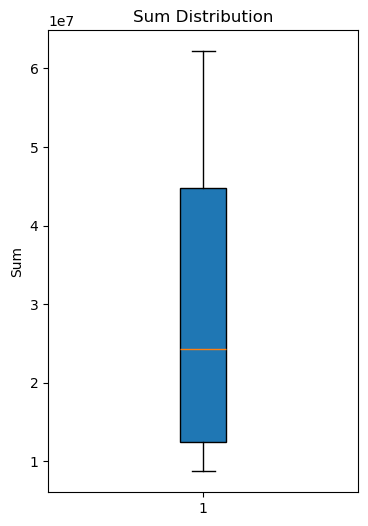

In [158]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,6))
sum = dfprovince['Sum'].dropna() # If you don't remove NANs, default matplotlib function will fail
plt.boxplot(sum, vert=True, patch_artist=True)
plt.title("Sum Distribution")
plt.ylabel("Sum")
plt.show()

Made this visualization code with Farheen.

In [159]:
%pip install --upgrade nbformat

Now, we will visualize the total sum of cars per region to provide a generic insight for the stakeholder. Since there are no NaN values, and this visualization is created to show describe the number of cars per region, we do not have to normalize the data. This specific data will be used to detect whether there are correlations between the measured PM2.5, PM10 and NO2, and the total numbers of cars per region.

In [160]:
import plotly.express as px


bar = px.bar(dfprovince, x='RegioS', y= 'Sum', title='Bar chart of sum of cars per region')
bar.update_layout(yaxis_title='Sum of cars', xaxis_title= "Region Code", barmode='group') 

bar.show()

##### However, for the predictive part it is important to standardize numerical data below, so that this data could be us to train and test the datasets and create samples that well represent the data. (machine learning algorithms, such as SVM, dbscan, etc.)

https://www.datacamp.com/tutorial/normalization-vs-standardization


In [161]:
from sklearn.preprocessing import StandardScaler

standardization = dfprovince[['Aanhangwagen_17',
            'Bestelauto_11',
            'Bus_15',
            'InBezitNatuurlijkePersonenRelatief_6',
            'InBezitNatuurlijkePersonen_5',
            'MotorfietsenRelatief_20',
            'Oplegger_18',
            'PersonenautoSRelatief_4',
            'SpeciaalVoertuig_14',
            'TotaalAanhangwagensEnOpleggers_16',
            'TotaalAanhangwagensEnOpleggers_9',
            'TotaalBedrijfsmotorvoertuigen_10',
            'TotaalBedrijfsmotorvoertuigen_8',
            'TotaalBedrijfsvoertuigen_7',
            'TotaalMotorfietsen_19',
            'TotaalMotorvoertuigen_2',
            'TotaalPersonenautoS_3',
            'TotaalWegvoertuigen_1',
            'TrekkerVoorOplegger_13',
            'VrachtautoExclTrekkerVoorOplegger_12']]


standardize = StandardScaler().fit_transform(standardization)

dfstandardization = pd.DataFrame(standardize, columns=standardization.columns)
print(dfstandardization)

    Aanhangwagen_17  Bestelauto_11    Bus_15  \
0         -0.826098      -0.964925 -0.580957   
1         -0.491041      -0.676733  0.872484   
2         -0.723266      -1.008951 -0.931738   
3          0.210462      -0.215500  0.309090   
4         -1.310117      -0.711399 -1.004122   
5          1.461661       0.782840 -0.493932   
6         -0.431911       0.090297  0.308059   
7          0.523144       1.021050  2.670520   
8          1.177683       1.695970  0.593468   
9         -1.131960      -1.141830 -0.797901   
10         1.852307       1.695805 -0.364220   
11        -0.310864      -0.566621 -0.580751   

    InBezitNatuurlijkePersonenRelatief_6  InBezitNatuurlijkePersonen_5  \
0                              -0.305425                     -0.884965   
1                               0.691308                     -0.751204   
2                               1.356838                     -0.893761   
3                               0.153884                     -0.228767   
4    

#### IMPORTANT: CHOOSE SAMPLING DURING THE PREDICTIVE PART. IT IS NOW NOT POSSIBLE TO CHOOSE THIS, BECAUSE THE SAMPLES NEEDS TO BE ALIGNED WITH PM2.5 PM10 AND NO2 DATA.

# API Luchtmeetnet NO2

In this part of the code, we will retrieve data from the luchtmeetnet api. We filter through the measurements using ?formula=NO2 , ?formula=PM10 and ?formula=PM25  

In [162]:
url_province = "https://api.luchtmeetnet.nl/open_api/stations"
posts_luchtmeetnet_province = requests.get(url_province).json()
pprint(posts_luchtmeetnet_province)


{'data': [{'location': 'Overschie-A13', 'number': 'NL01491'},
          {'location': 'Rotterdam-Maasvlakte', 'number': 'NL01497'},
          {'location': 'Rotterdam-HvHolland', 'number': 'NL01496'},
          {'location': 'Wijk aan Zee-Bosweg', 'number': 'NL49557'},
          {'location': 'Nistelrode-Gagelstraat', 'number': 'NL10248'},
          {'location': 'Ridderkerk-Voorweg', 'number': 'NL01912'},
          {'location': 'Meerssen- Beekerweg', 'number': 'NL50013'},
          {'location': 'Eijsden-Trichterweg', 'number': 'NL50012'},
          {'location': 'Rotterdam-Hoogvliet', 'number': 'NL01485'},
          {'location': 'Ridderkerk-A16', 'number': 'NL01489'},
          {'location': 'Zaandam-Wagenschotpad', 'number': 'NL49701'},
          {'location': 'Burgh-Haamstede', 'number': 'NL10320'},
          {'location': 'Zevenbergen-Galgenweg', 'number': 'NL53016'},
          {'location': 'Den Haag-Rebecquestraat', 'number': 'NL10404'},
          {'location': 'Den Haag-Amsterdamse Veerkad

In [163]:
dfposts_NO2_province = pd.DataFrame(posts_luchtmeetnet_province["data"])[['location','number']]
dfposts_NO2_province.head(10)

,location,number
0,Overschie-A13,NL01491
1,Rotterdam-Maasvlakte,NL01497
2,Rotterdam-HvHolland,NL01496
3,Wijk aan Zee-Bosweg,NL49557
4,Nistelrode-Gagelstraat,NL10248
5,Ridderkerk-Voorweg,NL01912
6,Meerssen- Beekerweg,NL50013
7,Eijsden-Trichterweg,NL50012
8,Rotterdam-Hoogvliet,NL01485
9,Ridderkerk-A16,NL01489


In [164]:
url = "https://api.luchtmeetnet.nl/open_api/measurements?formula=NO2" # get data from luchtmeetnet api and filter it so that only NO2 formulas will be retrieved
posts_luchtmeetnet_NO2 = requests.get(url).json()
#pprint(posts_luchtmeetnet_NO2)



This api contains the following data:
* forumla - categorical
* station_number - categorical
* timestamp_measured - datetime
* value - continous

In [165]:
dfposts_NO2 = pd.DataFrame(posts_luchtmeetnet_NO2["data"])[['formula',
           'station_number',
           'timestamp_measured',
           'value']]
print(dfposts_NO2.head(10))



  formula station_number         timestamp_measured  value
0     NO2        NL10131  2025-10-13T21:00:00+00:00  13.62
1     NO2        NL49012  2025-10-13T21:00:00+00:00  31.00
2     NO2        NL01913  2025-10-13T21:00:00+00:00  15.00
3     NO2        NL10444  2025-10-13T21:00:00+00:00   8.94
4     NO2        NL10636  2025-10-13T21:00:00+00:00   6.81
5     NO2        NL10450  2025-10-13T21:00:00+00:00  14.46
6     NO2        NL10639  2025-10-13T21:00:00+00:00   8.52
7     NO2        NL49561  2025-10-13T21:00:00+00:00  34.10
8     NO2        NL01497  2025-10-13T21:00:00+00:00  23.10
9     NO2        NL49680  2025-10-13T21:00:00+00:00   4.40


According to the boxplot, we can conclude that their are negative measurements points. This might be due to callibration errors or sensor noise. It is therefore important to ignore the negative values so that it will not influence the possibel decisions the stakeholder should take

In [166]:
pprint(dfposts_NO2['value'] <= 0)
pprint(len(dfposts_NO2['value'] >= 0))

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: value, Length: 1000, dtype: bool
1000


Since the data is real-time obtained from the api, meaning it changes the measure values every hour, it is important to determine as data analysts how we want to handle the negative values. We choose to ignore them so that the negative values could not influence how the data is perceived. 

In [167]:
import numpy as np


dfposts_NO2_clean= dfposts_NO2.copy()
dfposts_NO2_clean['value']= dfposts_NO2_clean['value'].mask(dfposts_NO2_clean['value'] < 0, np.nan)
print((dfposts_NO2_clean['value'] < 0).sum())


0


In [168]:
dfposts_NO2_raw = dfposts_NO2.copy()

In [169]:
meanlocation = dfposts_NO2_raw.groupby('station_number')['value'].mean().reset_index()

print(meanlocation)

   station_number      value
0         NL01485  23.709091
1         NL01487  16.453846
2         NL01488  15.092308
3         NL01489   9.976923
4         NL01491  11.008333
..            ...        ...
75        NL49704  12.407692
76        NL50002  11.500000
77        NL50003   9.545455
78        NL50010  11.000000
79        NL54004  23.333077

[80 rows x 2 columns]


In [170]:
meanlocation_clean = dfposts_NO2_clean.groupby('station_number')['value'].mean().reset_index()
print(meanlocation_clean)

   station_number      value
0         NL01485  23.709091
1         NL01487  16.453846
2         NL01488  15.092308
3         NL01489   9.976923
4         NL01491  11.008333
..            ...        ...
75        NL49704  12.407692
76        NL50002  11.500000
77        NL50003   9.545455
78        NL50010  11.000000
79        NL54004  23.333077

[80 rows x 2 columns]


In [171]:
# create a bar chart representing the mean from every location alongside their measured value (raw data)
bar = px.bar(meanlocation, x='station_number' , y= 'value', title='Average µg/m³ NO2 per station')
bar.update_layout(yaxis_title='NO2 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
bar.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=40,
    y1=40,
    name='Threshold of 40 µg/m³'
)

bar.show()

# create a bar chart representing the mean from every location alongside their measured value (clean data)
bar_NO2_clean = px.bar(meanlocation_clean, x='station_number' , y= 'value', title='Average µg/m³ NO2 per station')
bar_NO2_clean.update_layout(yaxis_title='NO2 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
bar_NO2_clean.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=40,
    y1=40,
    name='Threshold of 40 µg/m³'
)

bar_NO2_clean.show()

To keep an eye of the data granularity (the abstraction level of our data and what we aim to visualize) we choose to encode every station manually using the following to websites:
* 

In [172]:
NO2_pvencoding={'NL49703': 'Noord-Holland',
                  'NL49553': 'Noord-Holland',
                  'NL01493': 'Zuid-Holland',
                  'NL10404': 'Zuid-Holland',
                  'NL10318': 'Zeeland',
                  'NL01912': 'Zeeland',
                  'NL10742': 'Groningen',
                  'NL10538': 'Noord-Holland',
                  'NL01496': 'Zuid-Holland',
                  'NL01495': 'Zuid-Holland', 
                  'NL49007': 'Noord-Holland',
                  'NL10636': 'Utrecht',
                  'NL49564': 'Noord-Holland',
                  'NL10818': 'Overijssel',
                  'NL10550': 'Noord-Holland',
                  'NL49546': 'Noord-Holland',
                  'NL10136': 'Limburg',
                  'NL10235': 'Noord-Brabant',
                  'NL01913': 'Zeeland',
                  'NL10918': 'Friesland',
                  'NL01487': 'Zuid-Holland',
                  'NL10639': 'Utrecht',
                  'NL01497': 'Zeeland',
                  'NL10644': 'Utrecht',
                  'NL10633': 'Utrecht',
                  'NL10741': 'Gelderland',
                  'NL10437': 'Zeeland',
                  'NL10247':'Noord-Brabant', 
                  'NL10445':'Zeeland',
                  'NL10934': 'Friesland',
                  'NL01494': 'Zuid-Holland',
                  'NL10449': 'Zuid-Holland',
                  'NL49017': 'Noord-Holland',
                  'NL49551': 'Noord-Holland',
                  'NL10617': 'Flevoland', 
                  'NL10442': 'Zuid-Holland',
                  'NL10446': 'Zuid-Holland',
                  'NL49565': 'Noord-Holland',
                  'NL10418':'Zuid-Holland',
                  'NL10138': 'Limburg',
                  'NL10450': 'Zuid-Holland',
                  'NL10929': 'Drenthe',
                  'NL49561': 'Noord-Holland', 
                  'NL01485': 'Zuid-Holland',
                  'NL49003': 'Noord-Holland',
                  'NL10246': 'Noord-Brabant', 
                  'NL10133': 'Limburg',
                  'NL49020': 'Noord-Holland', 
                  'NL10444': 'Zuid-Holland',  
                  'NL10738': 'Gelderland',
                  'NL10107': 'Groningen',
                  'NL49680': 'Flevoland', 
                  'NL10643': 'Zuid-Holland', 
                  'NL10248': 'Noord-Brabant', 
                  'NL10240': 'Noord-Holland', 
                  'NL10230': 'Noord-Brabant',
                  'NL10131': 'Limburg', 
                  'NL49021': 'Noord-Holland',
                  'NL10938': 'Zuid-Holland',
                  'NL49019': 'Noord-Holland',
                  'NL49014': 'Noord-Holland',
                  'NL10641': 'Utrecht', 
                  'NL01491': 'Zuid-Holland',
                  'NL10236': 'Noord-Brabant',
                  'NL10241': 'Noord-Brabant',
                  'NL49701': 'Noord-Holland',
                  'NL49012': 'Noord-Holland', 
                  'NL10722': 'Gelderland',
                  'NL49704':'Noord-Holland',
                  'NL10807': 'Overijssel',
                  'NL01488': 'Zuid-Holland', 
                  'NL10301': 'Groningen',
                  'NL10937': 'Groningen',
                  'NL49002': 'Noord-Holland',
                  'NL50010': 'Limburg',
                  'NL50002': 'Limburg', 
                  'NL50003': 'Limburg',
                  'NL54004':'Gelderland',
                  'NL01489': 'Zuid-Holland',
                  'NL49022': 'Noord-Holland',
                  'NL10237': 'Noord-Brabant'}

dfposts_NO2['RegioS']  = dfposts_NO2['station_number'].map(NO2_pvencoding)
meanprovince = dfposts_NO2.groupby('RegioS')['value'].mean().reset_index()

print(meanprovince)


           RegioS      value
0         Drenthe   3.133077
1       Flevoland   3.500000
2       Friesland   2.115200
3      Gelderland  16.460800
4       Groningen  14.115000
5         Limburg  10.377412
6   Noord-Brabant  12.721702
7   Noord-Holland  15.190151
8      Overijssel   3.170000
9         Utrecht   8.691875
10        Zeeland  15.679459
11   Zuid-Holland  14.462920


In [173]:
print(meanprovince)

           RegioS      value
0         Drenthe   3.133077
1       Flevoland   3.500000
2       Friesland   2.115200
3      Gelderland  16.460800
4       Groningen  14.115000
5         Limburg  10.377412
6   Noord-Brabant  12.721702
7   Noord-Holland  15.190151
8      Overijssel   3.170000
9         Utrecht   8.691875
10        Zeeland  15.679459
11   Zuid-Holland  14.462920


In [174]:
dfposts_NO2_clean['RegioS']  = dfposts_NO2_clean['station_number'].map(NO2_pvencoding)
meanprovince_clean = dfposts_NO2_clean.groupby('RegioS')['value'].mean().reset_index()

print(meanprovince_clean)

           RegioS      value
0         Drenthe   3.133077
1       Flevoland   3.500000
2       Friesland   2.115200
3      Gelderland  16.460800
4       Groningen  14.115000
5         Limburg  10.377412
6   Noord-Brabant  12.721702
7   Noord-Holland  15.190151
8      Overijssel   3.170000
9         Utrecht   8.691875
10        Zeeland  15.679459
11   Zuid-Holland  14.462920


In [175]:
print(NO2_pvencoding)
print(dfposts_NO2['RegioS'])
dfposts_NO2.info()

{'NL49703': 'Noord-Holland', 'NL49553': 'Noord-Holland', 'NL01493': 'Zuid-Holland', 'NL10404': 'Zuid-Holland', 'NL10318': 'Zeeland', 'NL01912': 'Zeeland', 'NL10742': 'Groningen', 'NL10538': 'Noord-Holland', 'NL01496': 'Zuid-Holland', 'NL01495': 'Zuid-Holland', 'NL49007': 'Noord-Holland', 'NL10636': 'Utrecht', 'NL49564': 'Noord-Holland', 'NL10818': 'Overijssel', 'NL10550': 'Noord-Holland', 'NL49546': 'Noord-Holland', 'NL10136': 'Limburg', 'NL10235': 'Noord-Brabant', 'NL01913': 'Zeeland', 'NL10918': 'Friesland', 'NL01487': 'Zuid-Holland', 'NL10639': 'Utrecht', 'NL01497': 'Zeeland', 'NL10644': 'Utrecht', 'NL10633': 'Utrecht', 'NL10741': 'Gelderland', 'NL10437': 'Zeeland', 'NL10247': 'Noord-Brabant', 'NL10445': 'Zeeland', 'NL10934': 'Friesland', 'NL01494': 'Zuid-Holland', 'NL10449': 'Zuid-Holland', 'NL49017': 'Noord-Holland', 'NL49551': 'Noord-Holland', 'NL10617': 'Flevoland', 'NL10442': 'Zuid-Holland', 'NL10446': 'Zuid-Holland', 'NL49565': 'Noord-Holland', 'NL10418': 'Zuid-Holland', 'NL10

This data contains no NaN values, therefore we do not need to consider how to impute such data

In [176]:
import plotly.express as px
import plotly.graph_objects as go

pv = ['Groningen', 'Friesland', 'Drenthe', 'Overijssel', 'Gelderland', 'Flevoland',
      'Utrecht', 'Noord-Holland', 'Zuid-Holland', 'Noord-Brabant', 'Limburg', 'Zeeland' ]

pv_mean = meanprovince[meanprovince['RegioS'].isin(pv)]
bar = px.bar(meanprovince, x='RegioS' , y= dfposts_NO2.groupby('RegioS')['value'].mean(), title='Average µg/m³ NO2 per Region')
bar.update_layout(yaxis_title='NO2 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
bar.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=40,
    y1=40,
    name='Threshold of 40 µg/m³'
)

bar.show()


pv_mean_clean = meanprovince_clean[meanprovince_clean['RegioS'].isin(pv)]
bar_cleanno2 = px.bar(meanprovince_clean, x='RegioS' , y= dfposts_NO2_clean.groupby('RegioS')['value'].mean(), title='Average µg/m³ NO2 per Region')
bar_cleanno2.update_layout(yaxis_title='NO2 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
bar_cleanno2.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=40,
    y1=40,
    name='Threshold of 40 µg/m³'
)

bar_cleanno2.show()

In [177]:
dfposts_NO2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   formula             1000 non-null   object 
 1   station_number      1000 non-null   object 
 2   timestamp_measured  1000 non-null   object 
 3   value               1000 non-null   float64
 4   RegioS              1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [178]:
print(dfposts_NO2["station_number"].isna().sum())
print(dfposts_NO2["station_number"].nunique(), "station points")
print(dfposts_NO2["station_number"].unique())
print(dfposts_NO2["station_number"].value_counts())

0
80 station points
['NL10131' 'NL49012' 'NL01913' 'NL10444' 'NL10636' 'NL10450' 'NL10639'
 'NL49561' 'NL01497' 'NL49680' 'NL01494' 'NL10237' 'NL10418' 'NL10318'
 'NL49704' 'NL10236' 'NL10818' 'NL10246' 'NL10633' 'NL10442' 'NL01496'
 'NL10929' 'NL01485' 'NL10918' 'NL10107' 'NL10446' 'NL01912' 'NL10934'
 'NL10938' 'NL10807' 'NL49703' 'NL49701' 'NL10133' 'NL10449' 'NL10240'
 'NL10437' 'NL10301' 'NL10643' 'NL49002' 'NL10741' 'NL49564' 'NL10738'
 'NL54004' 'NL10617' 'NL01491' 'NL10247' 'NL49551' 'NL10241' 'NL10644'
 'NL01488' 'NL10550' 'NL49553' 'NL10937' 'NL10641' 'NL49014' 'NL49565'
 'NL10248' 'NL49546' 'NL01487' 'NL10230' 'NL10445' 'NL49019' 'NL49022'
 'NL49003' 'NL10136' 'NL01495' 'NL10138' 'NL10742' 'NL49017' 'NL01489'
 'NL49021' 'NL01493' 'NL10722' 'NL49020' 'NL49007' 'NL10404' 'NL50003'
 'NL50002' 'NL10235' 'NL50010']
station_number
NL10131    13
NL49012    13
NL10444    13
NL10636    13
NL49561    13
           ..
NL01485    11
NL49553    11
NL50003    11
NL50010    11
NL10235     

In [179]:
dfposts_NO2.describe(include="all")

,formula,station_number,timestamp_measured,value,RegioS
count,1000,1000,1000,1000.000000,1000
unique,1,80,13,NaN,12
top,NO2,NL10131,2025-10-13T20:00:00+00:00,NaN,Noord-Holland
freq,1000,13,80,NaN,265
mean,NaN,NaN,NaN,12.912540,NaN
std,NaN,NaN,NaN,9.448033,NaN
min,NaN,NaN,NaN,0.600000,NaN
25%,NaN,NaN,NaN,6.392500,NaN
50%,NaN,NaN,NaN,10.760000,NaN
75%,NaN,NaN,NaN,16.802500,NaN


According to this boxplot, their are some outliers. We choose to log transform to reduce the skewness of the dataset. 

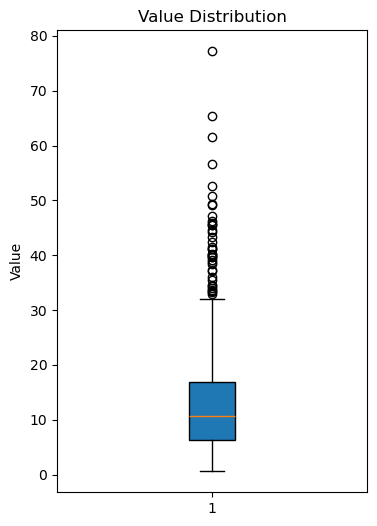

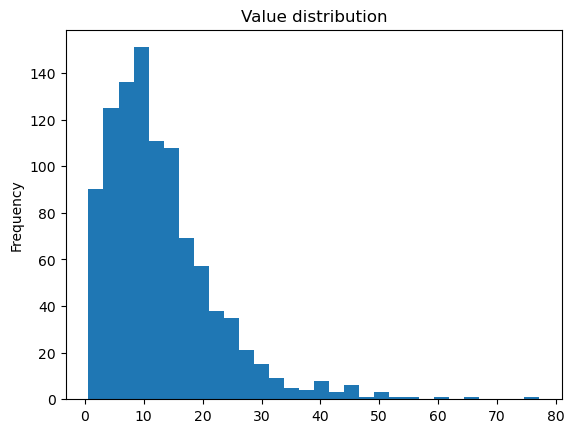

In [180]:
plt.figure(figsize=(4,6))
values = dfposts_NO2_clean['value'].dropna() # If you don't remove NANs, default matplotlib function will fail
plt.boxplot(values, vert=True, patch_artist=True)
plt.title("Value Distribution")
plt.ylabel("Value")
plt.show()

dfposts_NO2['value'].plot(kind='hist', bins=30, title='Value distribution')
plt.show()



In [181]:
!pip install seaborn

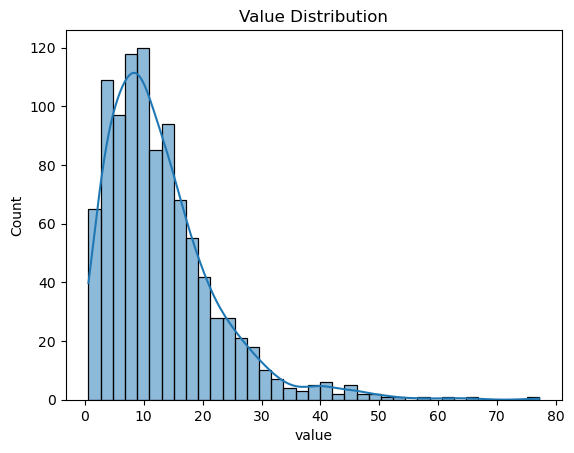

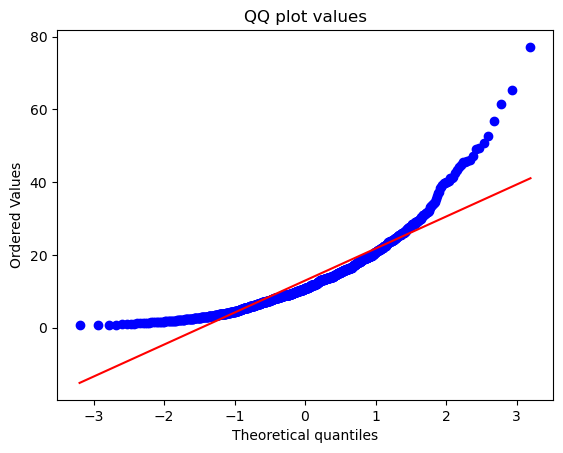

In [182]:
import scipy.stats as stats
import seaborn as sns 

sns.histplot(values, kde=True)
plt.title("Value Distribution")
plt.show()

stats.probplot(values, dist="norm", plot=plt)
plt.title("QQ plot values")
plt.show()

In [183]:
print(values.skew())


1.8030190625365048


In [184]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt




log_x = np.log(values)
print(log_x)



0      2.611539
1      3.433987
2      2.708050
3      2.190536
4      1.918392
         ...   
995    1.483875
996    3.819908
997    1.871802
998    2.227862
999    2.282382
Name: value, Length: 1000, dtype: float64


In [185]:
log_x.skew()

np.float64(-0.5476669120712384)

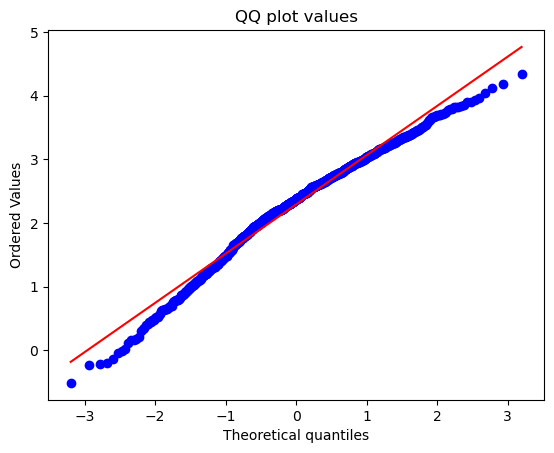

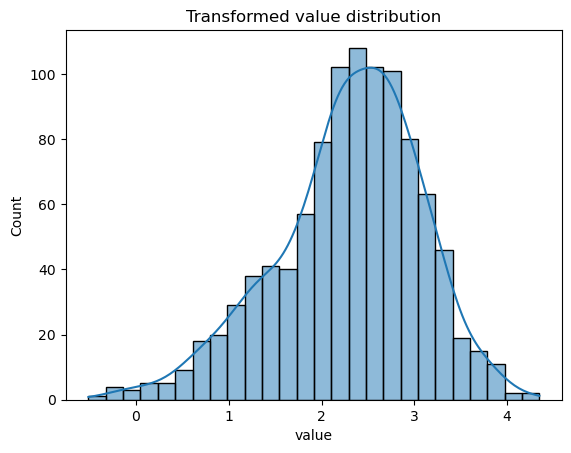

In [186]:
stats.probplot(log_x, dist="norm", plot=plt)
plt.title("QQ plot values")
plt.show()

sns.histplot(log_x,kde=True)
plt.title("Transformed value distribution")
plt.show()


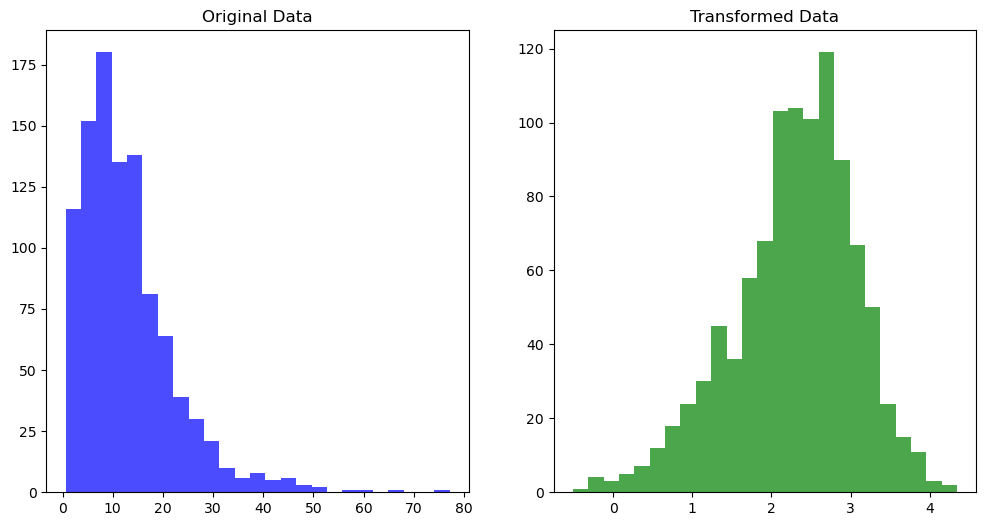

In [187]:

#distribution before transformation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(values, bins=25, color='blue', alpha=0.7)
plt.title('Original Data')

#distribution after transformation
plt.subplot(1, 2, 2)
plt.hist(log_x, bins=25, color='green', alpha=0.7)
plt.title('Transformed Data')

plt.show()

If you compare this boxplot with the boxplot before the transformation, you can see that it handled the outliers by compressing the larger measured values (handling datapoints that could be potentially marked as outliers). However, there are some negative datapoints now.
* Kijk naar hoe je om gaat met deze data

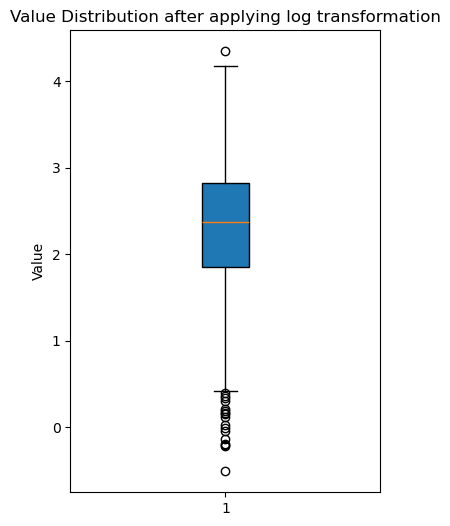

In [188]:
#boxplot after transformation
plt.figure(figsize=(4,6))
plt.boxplot(log_x, vert=True, patch_artist=True)
plt.title("Value Distribution after applying log transformation")
plt.ylabel("Value")
plt.show()

For the predicition part, we need the log_x data to standardize this. The reason why we standardize the data is because......

In [189]:
print(meanprovince_clean)
print(dftotal)

print(meanprovince['value'].mean())


           RegioS      value
0         Drenthe   3.133077
1       Flevoland   3.500000
2       Friesland   2.115200
3      Gelderland  16.460800
4       Groningen  14.115000
5         Limburg  10.377412
6   Noord-Brabant  12.721702
7   Noord-Holland  15.190151
8      Overijssel   3.170000
9         Utrecht   8.691875
10        Zeeland  15.679459
11   Zuid-Holland  14.462920
Aanhangwagen_17                           7357478
Bestelauto_11                             6797487
Bus_15                                      63458
InBezitNatuurlijkePersonenRelatief_6        38589
InBezitNatuurlijkePersonen_5             54388946
MotorfietsenRelatief_20                      3503
Oplegger_18                               1242123
PersonenautoSRelatief_4                     45252
SpeciaalVoertuig_14                        394020
TotaalAanhangwagensEnOpleggers_16         8599601
TotaalAanhangwagensEnOpleggers_9          8599601
TotaalBedrijfsmotorvoertuigen_10          8266837
TotaalBedrijfsmotorvoer

In [190]:

dfcorrelation = pd.merge(meanprovince, dfprovince, on='RegioS')

correlation = dfcorrelation[['value', 'Sum']].corr()
corr_matrix = go.Figure(data=go.Heatmap(
        z=correlation.values,
        x=correlation.columns,
        y=correlation.index,
        text=correlation.values, #Show the values in the heatmap
        texttemplate="%{text:.2f}",
        colorscale='Viridis')) #Create the heatmap figure

corr_matrix.show()

Since the log_x values are stores as series instead of dataframe, we need to reshape the data (1d). Since we mainly want to use numerical data for the prediction part we scale them so that they will have the same impact on the clustering algorithms (which are sensitive to different data scales). Moreover, it is less sensitive to outliers (compared to minmax() scaling), helping us to reduce the impact of such outliers. 
- https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num

In [191]:
standardizeNO2 = StandardScaler().fit_transform(log_x.values.reshape(-1,1))

dfstandardizationNO2 = pd.Series(standardizeNO2.flatten())
print(dfstandardizationNO2)

0      0.409915
1      1.466311
2      0.533879
3     -0.130845
4     -0.480401
         ...   
995   -1.038518
996    1.962008
997   -0.540243
998   -0.082902
999   -0.012872
Length: 1000, dtype: float64


# API Luchtmeetnet PM2.5

In [192]:
url = "https://api.luchtmeetnet.nl/open_api/measurements?formula=PM25" # get data from luchtmeetnet api and filter it so that only PM25 formulas will be retrieved
posts_luchtmeetnet_PM25 = requests.get(url).json()
#pprint(posts_luchtmeetnet_PM25)


In [193]:
dfposts_PM25 = pd.DataFrame(posts_luchtmeetnet_PM25["data"])[['formula',
           'station_number',
           'timestamp_measured',
           'value']]
print(dfposts_PM25.head(10))



  formula station_number         timestamp_measured  value
0    PM25        NL49016  2025-10-13T21:00:00+00:00   3.80
1    PM25        NL10240  2025-10-13T21:00:00+00:00   9.11
2    PM25        NL10934  2025-10-13T21:00:00+00:00   3.21
3    PM25        NL10937  2025-10-13T21:00:00+00:00   2.58
4    PM25        NL49701  2025-10-13T21:00:00+00:00   4.80
5    PM25        NL49014  2025-10-13T21:00:00+00:00   5.70
6    PM25        NL01497  2025-10-13T21:00:00+00:00   1.60
7    PM25        NL10636  2025-10-13T21:00:00+00:00   5.04
8    PM25        NL10241  2025-10-13T21:00:00+00:00   3.59
9    PM25        NL01494  2025-10-13T21:00:00+00:00   3.70


After analyzing this data, there are some negative values. In the following code, we will take a look at this negative values.

In [194]:
meanlocation_PM25 = dfposts_PM25.groupby('station_number')['value'].mean().reset_index()

print(meanlocation_PM25)

   station_number     value
0         NL01485  1.876471
1         NL01487  1.618750
2         NL01488  1.482353
3         NL01489  1.511765
4         NL01491  1.912500
..            ...       ...
57        NL50010  6.562500
58        NL50011  4.133333
59        NL50012  7.250000
60        NL54004  3.878571
61        NL54010  2.498750

[62 rows x 2 columns]


In [195]:
print(dfposts_PM25["station_number"].isna().sum())
print(dfposts_PM25["station_number"].nunique(), "station points")
print(dfposts_PM25["station_number"].unique())
print(dfposts_PM25["station_number"].value_counts())

0
62 station points
['NL49016' 'NL10240' 'NL10934' 'NL10937' 'NL49701' 'NL49014' 'NL01497'
 'NL10636' 'NL10241' 'NL01494' 'NL01912' 'NL01913' 'NL54004' 'NL10444'
 'NL10404' 'NL49703' 'NL10738' 'NL49553' 'NL10247' 'NL01493' 'NL10136'
 'NL01491' 'NL10643' 'NL49704' 'NL01485' 'NL01496' 'NL01488' 'NL49680'
 'NL10641' 'NL10418' 'NL10450' 'NL49980' 'NL10449' 'NL10821' 'NL10138'
 'NL10938' 'NL49570' 'NL49017' 'NL10248' 'NL10742' 'NL49573' 'NL49551'
 'NL10741' 'NL49003' 'NL49561' 'NL10644' 'NL49556' 'NL01495' 'NL10230'
 'NL10131' 'NL01487' 'NL49007' 'NL49012' 'NL54010' 'NL01489' 'NL49557'
 'NL50003' 'NL50012' 'NL50010' 'NL50007' 'NL50011' 'NL49572']
station_number
NL49016    17
NL10240    17
NL10934    17
NL10937    17
NL49701    17
           ..
NL50011    15
NL10821    15
NL49570    14
NL54004     7
NL49572     3
Name: count, Length: 62, dtype: int64


In [196]:
import numpy as np
uniqueNO2= dfposts_NO2['station_number'].unique()
print(uniqueNO2)

uniquePM25= dfposts_PM25['station_number'].unique()
print(uniquePM25)

intersection = np.intersect1d(uniqueNO2, uniquePM25)

print(len(intersection))

differenceno2 = np.setdiff1d(uniqueNO2, uniquePM25)
differencepm25 = np.setdiff1d(uniquePM25, uniqueNO2)
print(differencepm25, 'PM25 only')
print(differenceno2, 'NO2 only')


['NL10131' 'NL49012' 'NL01913' 'NL10444' 'NL10636' 'NL10450' 'NL10639'
 'NL49561' 'NL01497' 'NL49680' 'NL01494' 'NL10237' 'NL10418' 'NL10318'
 'NL49704' 'NL10236' 'NL10818' 'NL10246' 'NL10633' 'NL10442' 'NL01496'
 'NL10929' 'NL01485' 'NL10918' 'NL10107' 'NL10446' 'NL01912' 'NL10934'
 'NL10938' 'NL10807' 'NL49703' 'NL49701' 'NL10133' 'NL10449' 'NL10240'
 'NL10437' 'NL10301' 'NL10643' 'NL49002' 'NL10741' 'NL49564' 'NL10738'
 'NL54004' 'NL10617' 'NL01491' 'NL10247' 'NL49551' 'NL10241' 'NL10644'
 'NL01488' 'NL10550' 'NL49553' 'NL10937' 'NL10641' 'NL49014' 'NL49565'
 'NL10248' 'NL49546' 'NL01487' 'NL10230' 'NL10445' 'NL49019' 'NL49022'
 'NL49003' 'NL10136' 'NL01495' 'NL10138' 'NL10742' 'NL49017' 'NL01489'
 'NL49021' 'NL01493' 'NL10722' 'NL49020' 'NL49007' 'NL10404' 'NL50003'
 'NL50002' 'NL10235' 'NL50010']
['NL49016' 'NL10240' 'NL10934' 'NL10937' 'NL49701' 'NL49014' 'NL01497'
 'NL10636' 'NL10241' 'NL01494' 'NL01912' 'NL01913' 'NL54004' 'NL10444'
 'NL10404' 'NL49703' 'NL10738' 'NL49553' 'NL1

Note: it is important to make a copy of the data so that we can use it easily without any issues

In [197]:
dfposts_PM25_raw = dfposts_PM25.copy()

According to the boxplot, we can see that there are negative measurements points. This might be due to callibration errors or sensor noise. It is therefore important to ignore the negative values so that it will not influence the possible decisions the stakeholder should take.

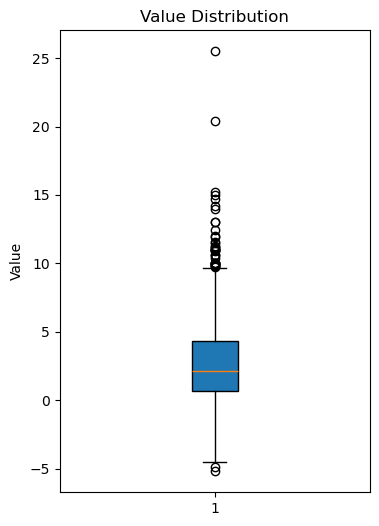

In [198]:
plt.figure(figsize=(4,6))
values_pm25 = dfposts_PM25_raw['value'].dropna() # If you don't remove NANs, default matplotlib function will fail
plt.boxplot(values_pm25, vert=True, patch_artist=True)
plt.title("Value Distribution")
plt.ylabel("Value")
plt.show()

In [199]:
pprint((dfposts_PM25['value'] < 0).sum())
pprint((dfposts_PM25['value'] > 0).sum())

np.int64(124)
np.int64(863)


According to the boxplot, we can see that there are negative measurements points. This might be due to callibration errors or sensor noise. It is therefore important to ignore the negative values so that it will not influence the possible decisions the stakeholder should take.

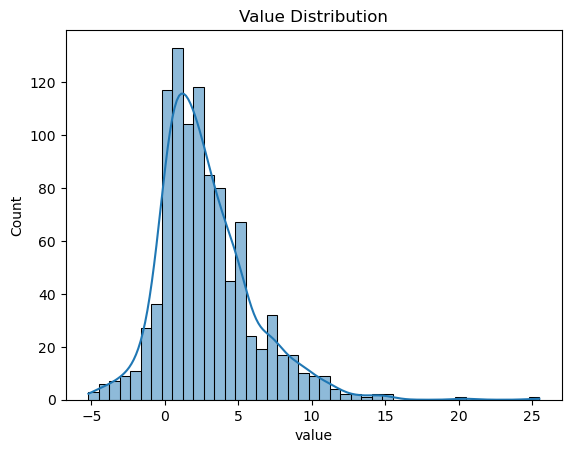

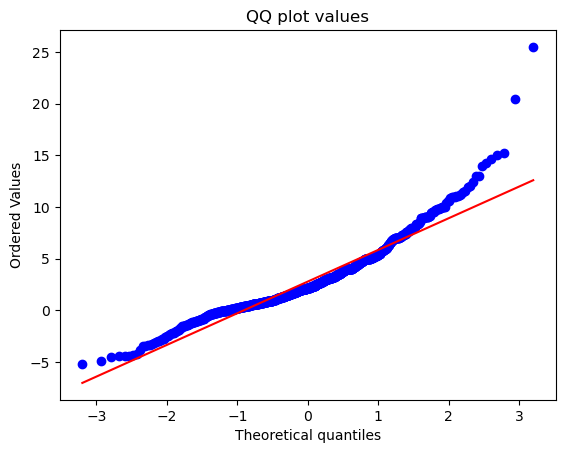

In [200]:
import scipy.stats as stats
import seaborn as sns 

sns.histplot(values_pm25, kde=True)
plt.title("Value Distribution")
plt.show()

stats.probplot(values_pm25, dist="norm", plot=plt)
plt.title("QQ plot values")
plt.show()

In [201]:
dfposts_PM25['value'].skew()

np.float64(1.2791274072991987)

In [263]:
c_pm25 = abs(values_pm25.min())

In [262]:
print(c_pm25)

0.0


In [281]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt



shiftpm25 = values_pm25 + c_pm25 + 0.01 # In case cpm25 is 0 add 0.00000001
log_xpm25 = np.log(shiftpm25)  
print(log_xpm25)

0      2.198335
1      2.661657
2      2.130610
3      2.052841
4      2.303585
         ...   
995    1.759581
996    2.416806
997    1.821318
998    1.437463
999    1.631199
Name: value, Length: 1000, dtype: float64


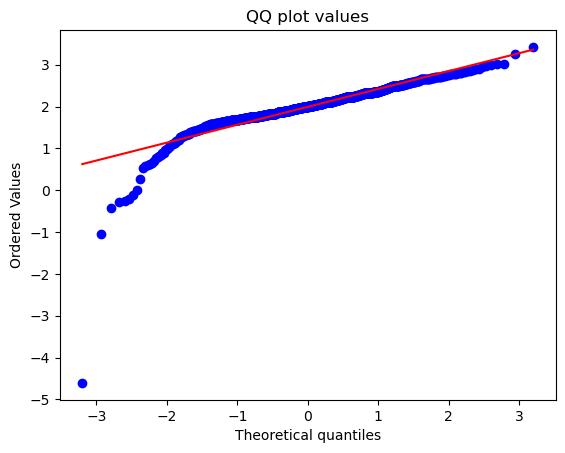

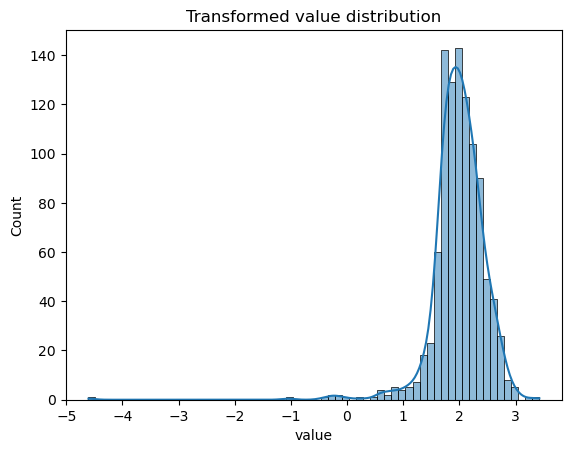

In [282]:
stats.probplot(log_xpm25, dist="norm", plot=plt)
plt.title("QQ plot values")
plt.show()

sns.histplot(log_xpm25,kde=True)
plt.title("Transformed value distribution")
plt.show()


The data will become more skewed after removing the negative values. However this step is necessary because negative values are not possible (occur probably due to calibration errors and therefore could be seen as noise). Before standardizing the data, we will first transform the data by compressing the larger values (making it more normally distributed).
- However this transformation will again lead to negative values. In this case we will apply the following formulae to tackle this issue
    - log(x) + c
        - x is in this case the values from the PM2.5 variable but the cleaned version
        - c will be in this case the absolute value of the minimum measured value from 'values_pm10_cleaned' variable.

This will only change the scale, but it will not have an impact on the overall distribution of the log transformation data.

After transforming the data, the data will become less skewed (however still slightly negatively skewed), making the data set more normally distributed.



In [283]:
log_xpm25.skew()

np.float64(-3.6089711985360697)

The above value shows that the distribution is negatively skewed (raw data) after the log transformation. For the cleaned data set, we follow the exact same steps and try to compare the results with the raw data.

In [284]:
dfposts_PM25_clean= dfposts_PM25.copy()

dfposts_PM25_clean['value']= dfposts_PM25_clean['value'].mask(dfposts_PM25_clean['value'] < 0, np.nan)

print((dfposts_PM25_clean['value'] < 0).sum())


0


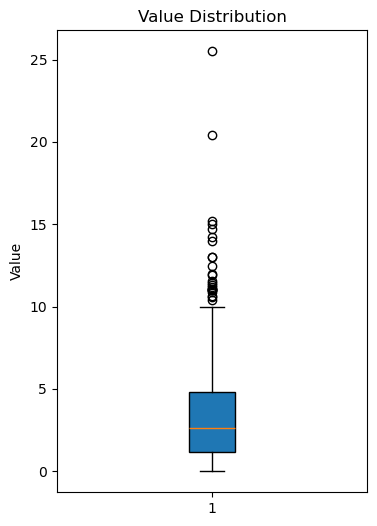

In [285]:
plt.figure(figsize=(4,6))
values_pm25_cleaned = dfposts_PM25_clean['value'].dropna() # If you don't remove NANs, default matplotlib function will fail
plt.boxplot(values_pm25_cleaned, vert=True, patch_artist=True)
plt.title("Value Distribution")
plt.ylabel("Value")
plt.show()

In [286]:
c_pm25_clean = abs(values_pm25_cleaned.min())

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt



shiftpm25_cleaned = values_pm25_cleaned + c_pm25_clean + 0.01 #add 0.01 in case c_pm25_clean will be 0
log_xpm25_cleaned = np.log(shiftpm25_cleaned)  
print(log_xpm25_cleaned)

0      1.337629
1      2.210470
2      1.169381
3      0.951658
4      1.570697
         ...   
993    1.611436
994    0.879627
995   -0.494296
996    1.793425
997   -0.020203
Name: value, Length: 876, dtype: float64


After the log transformation on the cleaned data set, you see that the distubition becomes less skewed compared to the log transformation on the cleaned data set. 

In [210]:
meanlocation_PM25_cleaned = dfposts_PM25_clean.groupby('station_number')['value'].mean().reset_index()

print(meanlocation_PM25_cleaned)

   station_number     value
0         NL01485  1.876471
1         NL01487  1.618750
2         NL01488  1.482353
3         NL01489  1.511765
4         NL01491  2.046667
..            ...       ...
57        NL50010  6.562500
58        NL50011  4.133333
59        NL50012  7.250000
60        NL54004  3.878571
61        NL54010  2.498750

[62 rows x 2 columns]


In [ ]:
# create bar with average measured pm2.5 values for each station on the raw data
bar_pm25 = px.bar(meanlocation_PM25, x='station_number' , y= 'value', title='Average µg/m³ PM2.5 per station')
bar_pm25.update_layout(yaxis_title='PM 2.5 in µg/m³', xaxis_title= "Station numbers", barmode='group') 

bar_pm25.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_pm25.show()

Based on the mean values, you can see that the negative values, which we marked as outliers, has an impact on the calculation of the means.

In [212]:
print(meanlocation_PM25['value'].mean())
print(meanlocation_PM25_cleaned['value'].mean())

2.8372622549019604
3.297070132258107


In [ ]:
# create bar with average measured pm2.5 values for each station on the clean data
bar_pm25_clean = px.bar(meanlocation_PM25_cleaned, x='station_number' , y= 'value', title='Average µg/m³ PM2.5 per station')
bar_pm25_clean.update_layout(yaxis_title='PM 2.5 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
bar_pm25_clean.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_pm25_clean.show()

In [293]:
raw = meanlocation_PM25.groupby('station_number')['value'].mean()
clean = meanlocation_PM25_cleaned.groupby('station_number')['value'].mean()

differencepm25_raw = np.setdiff1d(raw, clean )
differencepm25_clean = np.setdiff1d(clean, raw )
difference_mergepm25 = meanlocation_PM25.merge(meanlocation_PM25_cleaned, on='station_number')
difference= difference_mergepm25[difference_mergepm25['value_x'] != difference_mergepm25['value_y']]
print(difference)

   station_number   value_x   value_y
4         NL01491  1.912500  2.046667
9         NL01497  1.805882  1.925000
10        NL01912  1.062500  1.140000
12        NL10131  0.134118  2.196000
14        NL10138  5.527059  5.910000
15        NL10230 -1.122941  1.716667
16        NL10240  2.804118  3.389333
17        NL10241  1.197647  1.290625
18        NL10247  2.720000  3.213333
22        NL10444  2.319412  3.202857
24        NL10450  2.251176  2.463125
25        NL10636  1.539412  2.037857
26        NL10641  1.618235  2.772500
27        NL10643  2.405882  4.522500
28        NL10644  1.641765  2.078571
29        NL10738  2.857059  4.310833
30        NL10741  2.674375  2.934667
32        NL10821  2.475333  3.325000
33        NL10934  0.732353  2.065455
34        NL10937  2.160588  2.931429
35        NL10938  1.491176  3.997778
36        NL49003  0.668750  1.090909
40        NL49016  0.982353  1.353846
42        NL49551  3.568750  5.863636
44        NL49556  0.075000  1.987500
45        NL

Manually removing the NO2 only part and checking if len of the tuple is the same as the len of the intersection variable. If that's the case, the PM25 will be added to the tuple. We used the following links in order to manually link each station_numbers to its province: 
- https://www.rivm.nl/lucht/meten-modelleren-berekenen/overschrijdingen. 
- https://hollandse-luchten.org/kaart/?layers=meetvragen%7Cpm25%7Cwind&bounds=6.90754%7C52.2298%7C6.9314%7C52.24208

In [215]:
PM25_pvencoding = {'NL49703': 'Noord-Holland',
                  'NL49553': 'Noord-Holland',
                  'NL01493': 'Zuid-Holland',
                  'NL10404': 'Zuid-Holland',
                  'NL01912': 'Zeeland',
                  'NL10742': 'Groningen',
                  'NL10538': 'Noord-Holland',
                  'NL01496': 'Zuid-Holland',
                  'NL01495': 'Zuid-Holland', 
                  'NL49007': 'Noord-Holland',
                  'NL10636': 'Utrecht',
                  'NL10136': 'Limburg',
                  'NL01913': 'Zeeland',
                  'NL01487': 'Zuid-Holland',
                  'NL01497': 'Zeeland',
                  'NL10644': 'Utrecht',
                  'NL10741': 'Gelderland',
                  'NL10247':'Noord-Brabant', 
                  'NL10934': 'Friesland',
                  'NL01494': 'Zuid-Holland',
                  'NL10449': 'Zuid-Holland',
                  'NL49017': 'Noord-Holland',
                  'NL49551': 'Noord-Holland',
                  'NL10418':'Zuid-Holland',
                  'NL10138': 'Limburg',
                  'NL10450': 'Zuid-Holland',
                  'NL49561': 'Noord-Holland', 
                  'NL01485': 'Zuid-Holland',
                  'NL49003': 'Noord-Holland',
                  'NL10444': 'Zuid-Holland',  
                  'NL10738': 'Gelderland',
                  'NL49680': 'Flevoland', 
                  'NL10643': 'Zuid-Holland', 
                  'NL10248': 'Noord-Brabant', 
                  'NL10240': 'Noord-Holland', 
                  'NL10230': 'Noord-Brabant',
                  'NL10131': 'Limburg', 
                  'NL10938': 'Zuid-Holland',
                  'NL49014': 'Noord-Holland',
                  'NL10641': 'Utrecht', 
                  'NL01491': 'Zuid-Holland',
                  'NL10241': 'Noord-Brabant',
                  'NL49701': 'Noord-Holland',
                  'NL49012': 'Noord-Holland', 
                  'NL49704':'Noord-Holland',
                  'NL01488': 'Zuid-Holland', 
                  'NL10937': 'Groningen',
                  'NL50010': 'Limburg',
                  'NL50003': 'Limburg',
                  'NL54004':'Gelderland',
                  'NL01489': 'Zuid-Holland',
                  'NL10821': 'Overijssel', 
                  'NL49016': 'Noord-Holland',
                  'NL49556': 'Noord-Holland',
                  'NL49557': 'Noord-Holland',
                  'NL49570': 'Noord-Holland',
                  'NL49572': 'Noord-Holland',
                  'NL49573': 'Noord-Holland',
                  'NL49980': 'Groningen',
                  'NL50007': 'Limburg',
                  'NL50011': 'Limburg',
                  'NL50012': 'Limburg',
                  'NL54010': 'Gelderland' }



In [216]:
dfposts_PM25_raw['RegioS']  = dfposts_PM25_raw['station_number'].map(PM25_pvencoding)
meanprovince_pm25_raw = dfposts_PM25_raw.groupby('RegioS')['value'].mean().reset_index()

print(meanprovince_pm25_raw)


dfposts_PM25_clean['RegioS']  = dfposts_PM25_clean['station_number'].map(PM25_pvencoding)
meanprovince_pm25_clean = dfposts_PM25_clean.groupby('RegioS')['value'].mean().reset_index()

print("\n" , meanprovince_pm25_clean)


           RegioS     value
0       Flevoland  0.518750
1       Friesland  0.732353
2      Gelderland  2.830179
3       Groningen  4.136400
4         Limburg  5.291395
5   Noord-Brabant  2.758971
6   Noord-Holland  2.091028
7      Overijssel  2.475333
8         Utrecht  1.599804
9         Zeeland  2.076000
10   Zuid-Holland  2.684361

            RegioS     value
0       Flevoland  0.854545
1       Friesland  2.065455
2      Gelderland  3.257600
3       Groningen  4.492128
4         Limburg  5.808843
5   Noord-Brabant  4.198039
6   Noord-Holland  2.721266
7      Overijssel  3.325000
8         Utrecht  2.272500
9         Zeeland  2.166667
10   Zuid-Holland  3.002782


In [217]:
print('Mean PM2.5 value raw:', meanprovince_pm25_raw['value'].mean())
print('Mean PM2.5 value cleaned:', meanprovince_pm25_clean['value'].mean())

Mean PM2.5 value raw: 2.472233997784498
Mean PM2.5 value cleaned: 3.1058931452712133


In [218]:
dfposts_PM25_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   formula             1000 non-null   object 
 1   station_number      1000 non-null   object 
 2   timestamp_measured  1000 non-null   object 
 3   value               1000 non-null   float64
 4   RegioS              1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [294]:
dfposts_PM25_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   formula             1000 non-null   object 
 1   station_number      1000 non-null   object 
 2   timestamp_measured  1000 non-null   object 
 3   value               876 non-null    float64
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

pv = ['Groningen', 'Friesland', 'Drenthe', 'Overijssel', 'Gelderland', 'Flevoland',
      'Utrecht', 'Noord-Holland', 'Zuid-Holland', 'Noord-Brabant', 'Limburg', 'Zeeland' ]
# create bar chart of avg measured pm25 values alongside their province using the raw data set
pv_meanpm25 = meanprovince_pm25_raw[meanprovince_pm25_raw['RegioS'].isin(pv)]
bar_avgpm25_raw = px.bar(meanprovince_pm25_raw, x='RegioS' , y= meanprovince_pm25_raw['value'], title='Average µg/m³ PM2.5 per Region (raw data)')
bar_avgpm25_raw.update_layout(yaxis_title='PM2.5 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
bar_avgpm25_raw.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_avgpm25_raw.show()

In [221]:
import plotly.express as px
import plotly.graph_objects as go

pv = ['Groningen', 'Friesland', 'Drenthe', 'Overijssel', 'Gelderland', 'Flevoland',
      'Utrecht', 'Noord-Holland', 'Zuid-Holland', 'Noord-Brabant', 'Limburg', 'Zeeland' ]
# create bar chart of avg measured pm25 values alongside their province using the cleaned data set
pv_meanpm25 = meanprovince_pm25_clean[meanprovince_pm25_clean['RegioS'].isin(pv)]
bar_avgpm25_clean= px.bar(meanprovince_pm25_clean, x='RegioS' , y= meanprovince_pm25_clean['value'], title='Average µg/m³ PM2.5 per Region')
bar_avgpm25_clean.update_layout(yaxis_title='PM2.5 in µg/m³', xaxis_title= "Station numbers", barmode='group') 

bar_avgpm25_clean.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_avgpm25_clean.show()

In [222]:

dfcorrelation_pm25 = pd.merge(meanprovince_pm25_clean, dfprovince, on='RegioS')

correlation_pm25 = dfcorrelation_pm25[['value', 'Sum']].corr()
corr_matrix_pm25 = go.Figure(data=go.Heatmap(
        z=correlation_pm25.values,
        x=correlation_pm25.columns,
        y=correlation_pm25.index,
        text=correlation_pm25.values, #Show the values in the heatmap
        texttemplate="%{text:.2f}",
        colorscale='Viridis')) #Create the heatmap figure

corr_matrix_pm25.show()

Since the log_x values are stored as series instead of dataframe, we need to reshape the data (1d). Since we mainly want to use numerical data for the prediction part we scale them so that they will have the same impact on the clustering algorithms (which are sensitive to different data scales). Moreover, it is less sensitive to outliers (compared to minmax() scaling), helping us to reduce the impact of such outliers. 
- https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num

The reason why we first transformed the data using log is to make the distribution less skewed by compressing the extreme values.

In [295]:
standardizePM10 = StandardScaler().fit_transform(log_xpm25_cleaned.values.reshape(-1,1))

dfstandardizationPM10 = pd.Series(standardizePM10.flatten())
print(dfstandardizationPM10)

0      0.494438
1      1.226269
2      0.353371
3      0.170821
4      0.689853
         ...   
871    0.724010
872    0.110427
873   -1.041535
874    0.876598
875   -0.644033
Length: 876, dtype: float64


# API Luchtmeetnet PM10

This api contains the following data:
* forumla - categorical
* station_number - categorical
* timestamp_measured - datetime
* value - continous

In [224]:
url = "https://api.luchtmeetnet.nl/open_api/measurements?formula=PM10" # get data from luchtmeetnet api and filter it so that only PM10 formulas will be retrieved
posts_luchtmeetnet_PM10 = requests.get(url).json()
#pprint(posts_luchtmeetnet_PM10)

In [225]:
dfposts_PM10 = pd.DataFrame(posts_luchtmeetnet_PM10["data"])[['formula',
           'station_number',
           'timestamp_measured',
           'value']]
dfposts_PM10.head(10)

,formula,station_number,timestamp_measured,value
0,PM10,NL01491,2025-10-13T21:00:00+00:00,9.50
1,PM10,NL01494,2025-10-13T21:00:00+00:00,8.90
2,PM10,NL10818,2025-10-13T21:00:00+00:00,9.55
3,PM10,NL49003,2025-10-13T21:00:00+00:00,6.70
4,PM10,NL10248,2025-10-13T21:00:00+00:00,6.00
5,PM10,NL10442,2025-10-13T21:00:00+00:00,18.51
6,PM10,NL10636,2025-10-13T21:00:00+00:00,0.59
7,PM10,NL49556,2025-10-13T21:00:00+00:00,9.00
8,PM10,NL01497,2025-10-13T21:00:00+00:00,5.90
9,PM10,NL10722,2025-10-13T21:00:00+00:00,23.63


In [226]:
dfposts_PM10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   formula             1000 non-null   object 
 1   station_number      1000 non-null   object 
 2   timestamp_measured  1000 non-null   object 
 3   value               1000 non-null   float64
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


This dataset does not have any NaN values we need to impute/take into consideration

In [227]:
meanlocation_PM10 = dfposts_PM10.groupby('station_number')['value'].mean().reset_index()

print(meanlocation_PM10)

   station_number      value
0         NL01485   5.823077
1         NL01487   6.238462
2         NL01488   5.838462
3         NL01489   7.353846
4         NL01491  10.915385
..            ...        ...
75        NL50010  11.333333
76        NL50011  12.545455
77        NL50012  11.416667
78        NL54004   8.202857
79        NL54010   5.040769

[80 rows x 2 columns]


In [228]:
print(dfposts_PM10["station_number"].isna().sum())
print(dfposts_PM10["station_number"].nunique(), "station points")
print(dfposts_PM10["station_number"].unique())


0
80 station points
['NL01491' 'NL01494' 'NL10818' 'NL49003' 'NL10248' 'NL10442' 'NL10636'
 'NL49556' 'NL01497' 'NL10722' 'NL49014' 'NL01496' 'NL49012' 'NL10247'
 'NL49980' 'NL01488' 'NL10449' 'NL49561' 'NL49565' 'NL01485' 'NL10617'
 'NL49703' 'NL10918' 'NL10738' 'NL01495' 'NL49557' 'NL10133' 'NL01487'
 'NL49007' 'NL10236' 'NL49017' 'NL54010' 'NL10633' 'NL10741' 'NL10937'
 'NL54004' 'NL49680' 'NL10641' 'NL49553' 'NL49573' 'NL10241' 'NL10318'
 'NL01913' 'NL10445' 'NL49704' 'NL49016' 'NL10934' 'NL49020' 'NL10639'
 'NL10240' 'NL49701' 'NL10131' 'NL10418' 'NL10136' 'NL10230' 'NL10437'
 'NL49546' 'NL10450' 'NL01912' 'NL10929' 'NL10246' 'NL10444' 'NL10237'
 'NL10644' 'NL49570' 'NL01493' 'NL49551' 'NL10404' 'NL10550' 'NL01489'
 'NL10446' 'NL10807' 'NL10138' 'NL49564' 'NL50007' 'NL10235' 'NL50012'
 'NL50010' 'NL50003' 'NL50011']


In [229]:
import numpy as np
uniqueNO2= dfposts_NO2['station_number'].unique()
print(uniqueNO2)

uniquePM10= dfposts_PM10['station_number'].unique()
print(uniquePM10)

intersection_pm10 = np.intersect1d(uniqueNO2, uniquePM10)

print(len(intersection_pm10))

differenceno2 = np.setdiff1d(uniqueNO2, uniquePM10)
differencepm10 = np.setdiff1d(uniquePM10, uniqueNO2)
print(differencepm25, 'PM10 only')
print(differenceno2, 'NO2 only')


['NL10131' 'NL49012' 'NL01913' 'NL10444' 'NL10636' 'NL10450' 'NL10639'
 'NL49561' 'NL01497' 'NL49680' 'NL01494' 'NL10237' 'NL10418' 'NL10318'
 'NL49704' 'NL10236' 'NL10818' 'NL10246' 'NL10633' 'NL10442' 'NL01496'
 'NL10929' 'NL01485' 'NL10918' 'NL10107' 'NL10446' 'NL01912' 'NL10934'
 'NL10938' 'NL10807' 'NL49703' 'NL49701' 'NL10133' 'NL10449' 'NL10240'
 'NL10437' 'NL10301' 'NL10643' 'NL49002' 'NL10741' 'NL49564' 'NL10738'
 'NL54004' 'NL10617' 'NL01491' 'NL10247' 'NL49551' 'NL10241' 'NL10644'
 'NL01488' 'NL10550' 'NL49553' 'NL10937' 'NL10641' 'NL49014' 'NL49565'
 'NL10248' 'NL49546' 'NL01487' 'NL10230' 'NL10445' 'NL49019' 'NL49022'
 'NL49003' 'NL10136' 'NL01495' 'NL10138' 'NL10742' 'NL49017' 'NL01489'
 'NL49021' 'NL01493' 'NL10722' 'NL49020' 'NL49007' 'NL10404' 'NL50003'
 'NL50002' 'NL10235' 'NL50010']
['NL01491' 'NL01494' 'NL10818' 'NL49003' 'NL10248' 'NL10442' 'NL10636'
 'NL49556' 'NL01497' 'NL10722' 'NL49014' 'NL01496' 'NL49012' 'NL10247'
 'NL49980' 'NL01488' 'NL10449' 'NL49561' 'NL4

In [230]:
len(dfposts_PM10['station_number'])

1000

Manually removing the NO2 only part and checking if len of the tuple is the same as the len of the intersection variable. If that's the case, the PM10 will be added to the tuple. We used the following links in order to manually link each station_numbers to its province: 
- https://www.rivm.nl/lucht/meten-modelleren-berekenen/overschrijdingen. 
- https://hollandse-luchten.org/kaart/?layers=meetvragen%7Cpm10%7Cwind&bounds=4.98381%7C52.05999%7C5.26815%7C52.2067

In [231]:
PM10_pvencoding = {'NL49703': 'Noord-Holland',
                  'NL49553': 'Noord-Holland',
                  'NL01493': 'Zuid-Holland',
                  'NL10404': 'Zuid-Holland',
                  'NL10318': 'Zeeland',
                  'NL01912': 'Zeeland',
                  'NL10538': 'Noord-Holland',
                  'NL01496': 'Zuid-Holland',
                  'NL01495': 'Zuid-Holland', 
                  'NL49007': 'Noord-Holland',
                  'NL10636': 'Utrecht',
                  'NL49564': 'Noord-Holland',
                  'NL10818': 'Overijssel',
                  'NL10550': 'Noord-Holland',
                  'NL49546': 'Noord-Holland',
                  'NL10136': 'Limburg',
                  'NL10235': 'Noord-Brabant',
                  'NL01913': 'Zeeland',
                  'NL10918': 'Friesland',
                  'NL01487': 'Zuid-Holland',
                  'NL10639': 'Utrecht',
                  'NL01497': 'Zeeland',
                  'NL10644': 'Utrecht',
                  'NL10633': 'Utrecht',
                  'NL10741': 'Gelderland',
                  'NL10437': 'Zeeland',
                  'NL10247':'Noord-Brabant', 
                  'NL10445':'Zeeland',
                  'NL10934': 'Friesland',
                  'NL01494': 'Zuid-Holland',
                  'NL10449': 'Zuid-Holland',
                  'NL49017': 'Noord-Holland',
                  'NL49551': 'Noord-Holland',
                  'NL10617': 'Flevoland', 
                  'NL10442': 'Zuid-Holland',
                  'NL10446': 'Zuid-Holland',
                  'NL49565': 'Noord-Holland',
                  'NL10418':'Zuid-Holland',
                  'NL10138': 'Limburg',
                  'NL10450': 'Zuid-Holland',
                  'NL10929': 'Drenthe',
                  'NL49561': 'Noord-Holland', 
                  'NL01485': 'Zuid-Holland',
                  'NL49003': 'Noord-Holland',
                  'NL10246': 'Noord-Brabant', 
                  'NL10133': 'Limburg',
                  'NL49020': 'Noord-Holland', 
                  'NL10444': 'Zuid-Holland',  
                  'NL10738': 'Gelderland',
                  'NL49680': 'Flevoland', 
                  'NL10248': 'Noord-Brabant', 
                  'NL10240': 'Noord-Holland', 
                  'NL10230': 'Noord-Brabant',
                  'NL10131': 'Limburg', 
                  'NL49014': 'Noord-Holland',
                  'NL10641': 'Utrecht', 
                  'NL01491': 'Zuid-Holland',
                  'NL10236': 'Noord-Brabant',
                  'NL10241': 'Noord-Brabant',
                  'NL49701': 'Noord-Holland',
                  'NL49012': 'Noord-Holland', 
                  'NL10722': 'Gelderland',
                  'NL49704':'Noord-Holland',
                  'NL10807': 'Overijssel',
                  'NL01488': 'Zuid-Holland', 
                  'NL10937': 'Groningen',
                  'NL50010': 'Limburg', 
                  'NL50003': 'Limburg',
                  'NL54004':'Gelderland',
                  'NL01489': 'Zuid-Holland', 
                  'NL10821': 'Overijssel', 
                  'NL49016': 'Noord-Holland' ,
                  'NL49556': 'Noord-Holland', 
                  'NL49557': 'Noord-Holland', 
                  'NL49570': 'Noord-Holland',
                  'NL49572': 'Noord-Holland', 
                  'NL49573': 'Noord-Holland',
                  'NL49980': 'Groningen', 
                  'NL50007': 'Limburg', 
                  'NL50011': 'Limburg',  
                  'NL50012': 'Limburg', 
                  'NL54010': 'Gelderland'}

In [232]:
len(PM10_pvencoding)

82

In [233]:
bar_pm10 = px.bar(meanlocation_PM10, x='station_number' , y= 'value', title='Average µg/m³ PM10 per station')
bar_pm10.update_layout(yaxis_title='PM10 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
bar_pm10.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_pm10.show()

In [234]:
dfposts_PM10['RegioS']  = dfposts_PM10['station_number'].map(PM25_pvencoding)
meanprovince_pm10 = dfposts_PM10.groupby('RegioS')['value'].mean().reset_index()

print(meanprovince_pm10)


          RegioS      value
0      Flevoland   4.815385
1      Friesland   8.565385
2     Gelderland   8.379111
3      Groningen  10.668846
4        Limburg  11.248041
5  Noord-Brabant   7.294694
6  Noord-Holland   6.130963
7        Utrecht   3.857368
8        Zeeland   7.071795
9   Zuid-Holland   7.636034


In [235]:
dfposts_PM10_raw = dfposts_PM10.copy()

According to the boxplot, we can see that there are negative measurements points. This might be due to callibration errors or sensor noise. It is therefore important to ignore the negative values so that it will not influence the possible decisions the stakeholder should take.

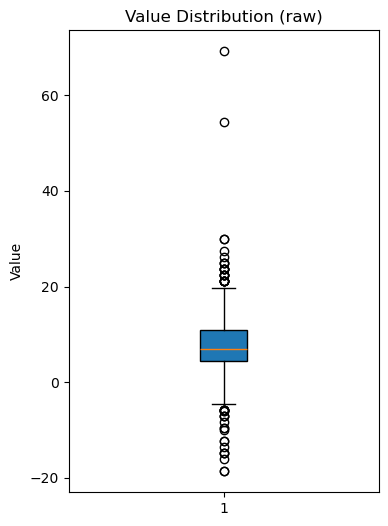

In [236]:
plt.figure(figsize=(4,6))
values_pm10_raw = dfposts_PM10_raw['value'].dropna() # If you don't remove NANs, default matplotlib function will fail
plt.boxplot(values_pm10_raw, vert=True, patch_artist=True)
plt.title("Value Distribution (raw)")
plt.ylabel("Value")
plt.show()

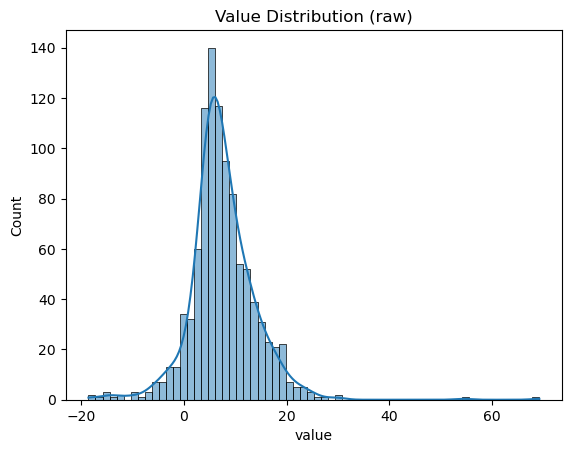

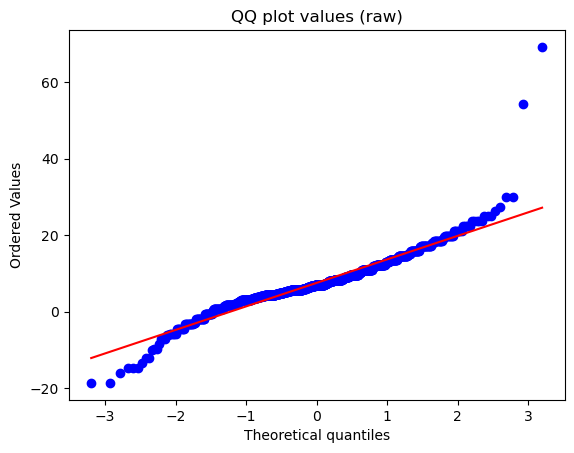

In [238]:
import scipy.stats as stats
import seaborn as sns 

sns.histplot(values_pm10_raw, kde=True)
plt.title("Value Distribution (raw)")
plt.show()

stats.probplot(values_pm10_raw, dist="norm", plot=plt)
plt.title("QQ plot values (raw)")
plt.show()

In [239]:
values_pm10_raw.skew()

np.float64(1.175431708117004)

In [240]:
dfposts_PM10_clean= dfposts_PM10.copy()

dfposts_PM10_clean['value']= dfposts_PM10_clean['value'].mask(dfposts_PM10_clean['value'] < 0, np.nan)

print((dfposts_PM10_clean['value'] < 0).sum())


0


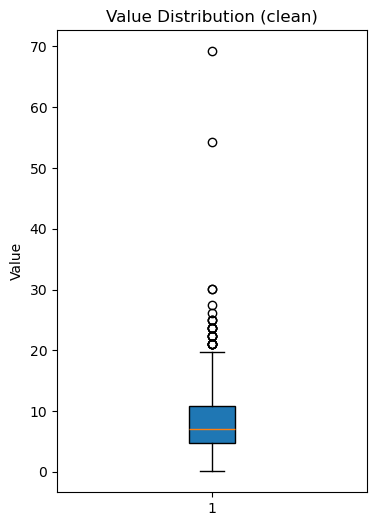

In [241]:
plt.figure(figsize=(4,6))
values_pm10_cleaned = dfposts_PM10_clean['value'].dropna() # If you don't remove NANs, default matplotlib function will fail
plt.boxplot(values_pm10_cleaned, vert=True, patch_artist=True)
plt.title("Value Distribution (clean)")
plt.ylabel("Value")
plt.show()

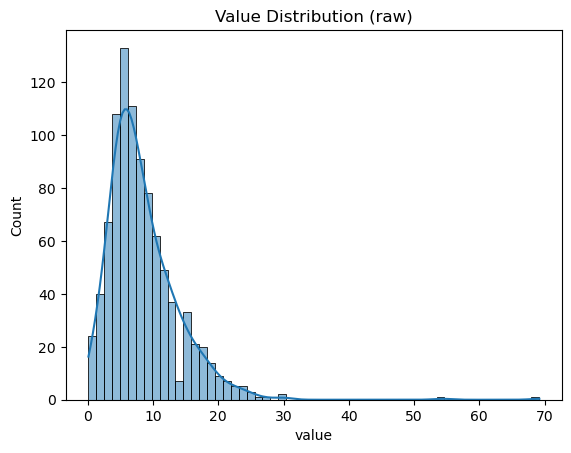

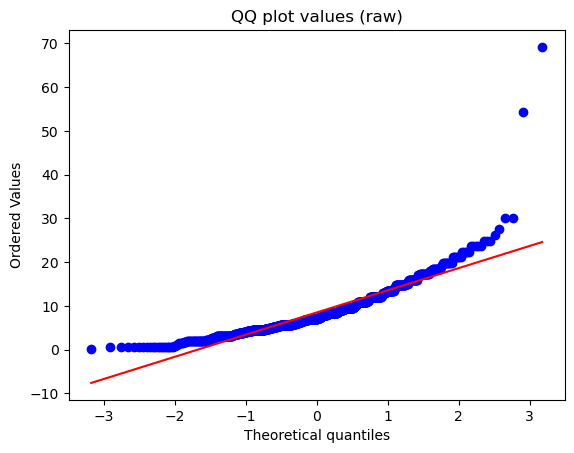

In [242]:
import scipy.stats as stats
import seaborn as sns 

sns.histplot(values_pm10_cleaned, kde=True)
plt.title("Value Distribution (raw)")
plt.show()

stats.probplot(values_pm10_cleaned, dist="norm", plot=plt)
plt.title("QQ plot values (raw)")
plt.show()

In [243]:
print(values_pm10_cleaned)

0      9.50
1      8.90
2      9.55
3      6.70
4      6.00
       ... 
994    8.70
995    4.30
996    2.98
997    4.20
999    3.60
Name: value, Length: 930, dtype: float64


In [244]:
print(values_pm10_cleaned.skew())

2.7570710913163


The data will become more skewed after removing the negative values. However this step is necessary because negative values are not possible (occur probably due to calibration errors and therefore could be seen as noise). Before standardizing the data, we will first transform the data by compressing the larger values (making it more normally distributed).
- However this transformation will again lead to negative values. In this case we will apply the following formulae to tackle this issue
    - log(x) + c
        - x is in this case the values from the PM2.5 variable but the cleaned version
        - c will be in this case the absolute value of the minimum measured value from 'values_pm10_cleaned' variable.

This will only change the scale, but it will not have an impact on the overall distribution of the log transformation data.

After transforming the data, the data will become less skewed (however still slightly negatively skewed), making the data set more normally distributed.



In [245]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
c = abs(values_pm10_cleaned.min())

shift = values + c
log_xpm10_clean = np.log(shift)  
print(log_xpm10_clean)


0      2.618855
1      3.437208
2      2.714695
3      2.201659
4      1.932970
         ...   
995    1.506297
996    3.822098
997    1.887070
998    2.238580
999    2.292535
Name: value, Length: 1000, dtype: float64


In [246]:
print(np.min(log_xpm10_clean))

-0.35667494393873245


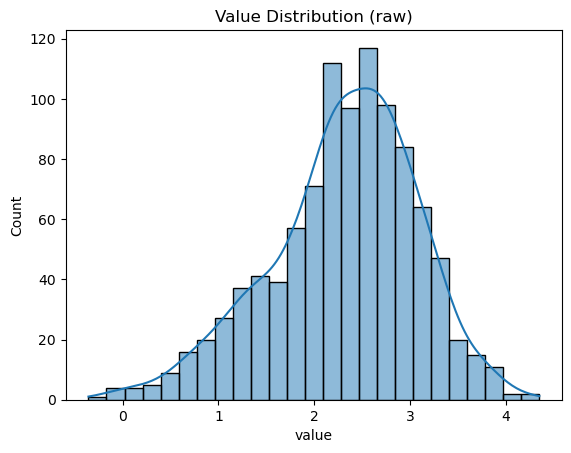

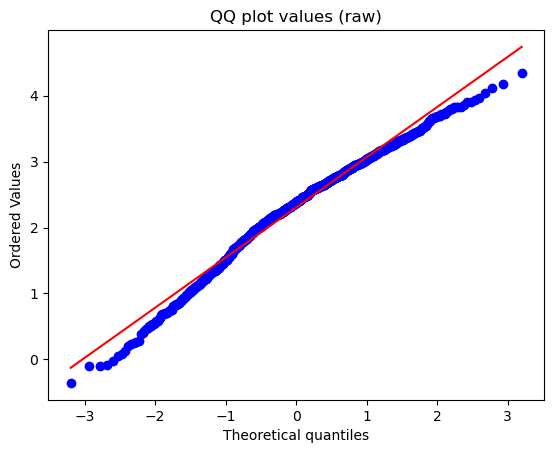

In [247]:
import scipy.stats as stats
import seaborn as sns 

sns.histplot(log_xpm10_clean, kde=True)
plt.title("Value Distribution (raw)")
plt.show()

stats.probplot(log_xpm10_clean, dist="norm", plot=plt)
plt.title("QQ plot values (raw)")
plt.show()

Removing the negative values could lead to a higher polution value, which you will see in the following cell:

In [248]:
dfposts_PM10_raw['RegioS']  = dfposts_PM10_raw['station_number'].map(PM10_pvencoding)
meanprovince_pm10_raw = dfposts_PM10_raw.groupby('RegioS')['value'].mean().reset_index()

print(meanprovince_pm10_raw)


dfposts_PM10_clean['RegioS']  = dfposts_PM10_clean['station_number'].map(PM10_pvencoding)
meanprovince_pm10_clean = dfposts_PM10_clean.groupby('RegioS')['value'].mean().reset_index()

print("\n" , meanprovince_pm10_clean)


           RegioS      value
0         Drenthe  10.534615
1       Flevoland   5.016538
2       Friesland   8.220769
3      Gelderland   9.105000
4       Groningen  10.668846
5         Limburg  11.472110
6   Noord-Brabant   7.422025
7   Noord-Holland   6.173922
8      Overijssel   7.920909
9         Utrecht   5.170000
10        Zeeland   6.226795
11   Zuid-Holland   7.554098

            RegioS      value
0         Drenthe  14.158000
1       Flevoland   6.206087
2       Friesland   9.070000
3      Gelderland  10.186111
4       Groningen  11.225600
5         Limburg  11.912925
6   Noord-Brabant  10.526875
7   Noord-Holland   6.376739
8      Overijssel  10.474444
9         Utrecht   6.372857
10        Zeeland   8.575942
11   Zuid-Holland   8.076327


In [249]:
meanlocation_PM10_cleaned = dfposts_PM10_clean.groupby('station_number')['value'].mean().reset_index()

print(meanlocation_PM10_cleaned)

   station_number      value
0         NL01485   5.823077
1         NL01487   6.238462
2         NL01488   5.838462
3         NL01489   7.353846
4         NL01491  10.915385
..            ...        ...
75        NL50010  11.333333
76        NL50011  12.545455
77        NL50012  11.416667
78        NL54004   8.202857
79        NL54010   5.040769

[80 rows x 2 columns]


For us as data analysts it is useful to check where the negative values influenced the measured mean value (per station)

In [250]:
rawpm10 = meanlocation_PM10.groupby('station_number')['value'].mean()
cleanpm10 = meanlocation_PM10_cleaned.groupby('station_number')['value'].mean()


differencepm10_raw = np.setdiff1d(rawpm10, cleanpm10 ) #check values that differ from raw dataset
differencepm10_clean = np.setdiff1d(cleanpm10, rawpm10 ) #check values that differ from cleaned dataset
difference_mergepm10 = meanlocation_PM10.merge(meanlocation_PM10_cleaned, on='station_number') #
differencepm10= difference_mergepm10[difference_mergepm10['value_x'] != difference_mergepm10['value_y']]
print(differencepm10)

   station_number    value_x    value_y
12        NL10131   8.663846  10.830000
13        NL10133  13.283333  15.019091
16        NL10230   6.005385   9.294000
17        NL10235   8.910000  12.622000
19        NL10237  11.528182  14.527778
20        NL10240   6.103846   6.776667
21        NL10241  16.078000  22.670000
22        NL10246   5.011818   6.421111
23        NL10247   6.891538   9.200909
24        NL10248   2.230769   7.125000
25        NL10318   0.196154  11.561429
26        NL10404   7.679231  10.131818
27        NL10418   5.513077   7.886000
28        NL10437   6.005385   9.550000
29        NL10442   7.777692   8.696667
31        NL10445   9.943846  10.830000
32        NL10446   6.202308   9.294000
35        NL10550   6.497692   9.166000
36        NL10617   5.217692   8.014000
38        NL10636   2.510000   3.790000
39        NL10639   7.482308   8.163333
40        NL10641   4.922308   7.374000
41        NL10644   4.036154   5.477273
42        NL10722  11.617692  14.553636


In [251]:
# This piece of code will create bar chart to visualize the averages of pm25 for each station using the raw data
bar_pm10 = px.bar(meanlocation_PM10, x='station_number' , y= 'value', title='Average µg/m³ PM2.5 per station (raw)')
bar_pm10.update_layout(yaxis_title='PM 2.5 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
bar_pm10.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_pm10.show()

# This piece of code will create bar chart to visualize the averages of pm25 for each station using the cleaned data
bar_pm10_cleaned = px.bar(meanlocation_PM10_cleaned, x='station_number' , y= 'value', title='Average µg/m³ PM2.5 per station (clean)')
bar_pm10_cleaned.update_layout(yaxis_title='PM 2.5 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
bar_pm10_cleaned.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_pm10_cleaned.show()

The following piece of code will show the impact of data cleaning on the average mean on a national level. According to these values, you can state that the negative values heavily impacted how the data will be perceived. Using the cleaned data will eventually help is reducing bias by helping to portray a more accurate representation of trends during the prediction phase.

In [252]:
print(meanprovince_pm10_raw)
print('Mean PM2.5 value raw:', meanprovince_pm25_raw['value'].mean(), '\n')

print(meanprovince_pm10_clean)
print('Mean PM2.5 value cleaned:', meanprovince_pm10_clean['value'].mean())

           RegioS      value
0         Drenthe  10.534615
1       Flevoland   5.016538
2       Friesland   8.220769
3      Gelderland   9.105000
4       Groningen  10.668846
5         Limburg  11.472110
6   Noord-Brabant   7.422025
7   Noord-Holland   6.173922
8      Overijssel   7.920909
9         Utrecht   5.170000
10        Zeeland   6.226795
11   Zuid-Holland   7.554098
Mean PM2.5 value raw: 2.472233997784498 

           RegioS      value
0         Drenthe  14.158000
1       Flevoland   6.206087
2       Friesland   9.070000
3      Gelderland  10.186111
4       Groningen  11.225600
5         Limburg  11.912925
6   Noord-Brabant  10.526875
7   Noord-Holland   6.376739
8      Overijssel  10.474444
9         Utrecht   6.372857
10        Zeeland   8.575942
11   Zuid-Holland   8.076327
Mean PM2.5 value cleaned: 9.430158906105738


In [253]:
import plotly.express as px
import plotly.graph_objects as go


#create bar chart that will visualize the provinces alongside their average measured value (using the raw dataset)
pv = ['Groningen', 'Friesland', 'Drenthe', 'Overijssel', 'Gelderland', 'Flevoland',
      'Utrecht', 'Noord-Holland', 'Zuid-Holland', 'Noord-Brabant', 'Limburg', 'Zeeland' ]

pv_meanpm10pv = meanprovince_pm10_raw[meanprovince_pm10_raw['RegioS'].isin(pv)]
bar_pm10pv = px.bar(meanprovince_pm10_raw, x='RegioS' , y= dfposts_PM10_raw.groupby('RegioS')['value'].mean(), title='Average µg/m³ PM10 per Region')
bar_pm10pv.update_layout(yaxis_title='PM10 in µg/m³', xaxis_title= "Provinces", barmode='group') 
bar_pm10pv.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_pm10pv.show()


#create bar chart that will visualize the provinces alongside their average measured value (using the cleaned dataset)
pv_meanpm10_cleaned = meanprovince_pm10_clean[meanprovince_pm10_clean['RegioS'].isin(pv)]
bar_pm10pv_cleaned = px.bar(meanprovince_pm10_clean, x='RegioS' , y= dfposts_PM10_clean.groupby('RegioS')['value'].mean(), title='Average µg/m³ PM10 per Region (clean)')
bar_pm10pv_cleaned.update_layout(yaxis_title='PM10 in µg/m³', xaxis_title= "Provinces", barmode='group') 
bar_pm10pv_cleaned.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_pm10pv_cleaned.show()

In [254]:

dfcorrelation_pm10 = pd.merge(meanprovince_pm10_clean, dfprovince, on='RegioS')

correlation_pm10 = dfcorrelation_pm10[['value', 'Sum']].corr()
corr_matrix_pm10 = go.Figure(data=go.Heatmap(
        z=correlation_pm10.values,
        x=correlation_pm10.columns,
        y=correlation_pm10.index,
        text=correlation_pm10.values, #Show the values in the heatmap
        texttemplate="%{text:.2f}",
        colorscale='Viridis')) #Create the heatmap figure

corr_matrix_pm10.show()

Since the log_xpm10_cleaned values are stored as series instead of dataframe, we need to reshape the data (1d). Since we mainly want to use numerical data for the prediction part we scale them so that they will have the same impact on the clustering algorithms (which are sensitive to different data scales). Moreover, it is less sensitive to outliers (compared to minmax() scaling), helping us to reduce the impact of such outliers. 
- https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num

The reason why we first transformed the data using log is to make the distribution less skewed by compressing the extreme values.

In [255]:
standardizeNO2 = StandardScaler().fit_transform(log_xpm10_clean.values.reshape(-1,1))

dfstandardizationNO2 = pd.Series(standardizeNO2.flatten())
print(dfstandardizationNO2)

0      0.408056
1      1.477067
2      0.533251
3     -0.136925
4     -0.487913
         ...   
995   -1.045274
996    1.979848
997   -0.547872
998   -0.088696
999   -0.018215
Length: 1000, dtype: float64


###### https://stackoverflow.com/questions/70563254/map-of-a-country-with-plotly

In [256]:
!pip install dash

In [257]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)

app.layout = html.Div([
    html.H4('Air quality'),
    dcc.Dropdown(
        id="dropdown",
        options=["PM10", "PM2.5", "NO2"],
        value="PM10",
        clearable=False,
    ),
    dcc.Graph(id="graph"),
])

@app.callback(
    Output("graph", "figure"),
    Input("dropdown", "value"))
def update_bar_chart(typepolution):
    if typepolution=="PM10":
        return bar_pm10pv_cleaned
    elif typepolution=="PM2.5":
        return bar_avgpm25_clean
    if typepolution=="NO2":
        return bar_cleanno2


app.run(debug=True)

OSError: Address 'http://127.0.0.1:8050' already in use.
    Try passing a different port to run.

In [ ]:
import os
print(os.path.exists("data/main/Preprocessors/georef-netherlands-provincie.geojson"))
print(os.getcwd())


False
C:\Users\Ratiba Zaid\AppData\Local\Programs\Microsoft VS Code


In [ ]:
%pip install geopandas

Note: you may need to restart the kernel to use updated packages.


Making path relative (instead of retrieving files locally)

In [ ]:
import geopandas as gpd

AQI_NO2 = {
    (0, 10):           ("Good",           "green"),
    (10, 25):          ("Fair",           "yellow"),
    (25, 60):          ("Moderate",       "orange"),
    (60, 100):         ("Poor",           "red"),
    (100, 150):        ("Very Poor",      "darkred"),
    (150, math.inf):   ("Extremely Poor", "purple"),
}

def no2_colour_pollution(val):
    if val is None or (isinstance(val, float) and pd.isna(val)):
        return "gray"
    try:
        x = float(val)
    except (TypeError, ValueError):
        return "gray"
    for (lo, hi), (_label, color) in AQI_NO2.items():
        if lo <= x < hi:
            return color
    return "gray"

# to allign province naam (Fryslân -> Friesland)
def norm_prov(p):
    if isinstance(p, list) and len(p) > 0:
        p = p[0]
    if isinstance(p, str):
        p = p.strip()
    return {"Fryslân": "Friesland"}.get(p, p)


gdfpath = "R-Zaid/DSS-project/main/Preprocessors/georef-netherlands-provincie.geojson"
dfpath  = "R-Zaid/DSS-project/main/Preprocessors/georef-netherlands-provincie.geojson"
gdf = gpd.read_file(gdfpath)
df = pd.read_json(dfpath)

gdf["prov_name"] = df["prov_name"]

#  'province' colums to match meanprovince -
gdf["province"] = gdf["prov_name"].apply(norm_prov)


mp = meanprovince.copy()
mp["province"] = mp["RegioS"].apply(norm_prov)
mean_map = dict(zip(mp["province"], mp["value"]))   # province -> NO2_mean

# add NO2_mean to gdf via with matching province name 
gdf["NO2_mean"] = gdf["province"].map(mean_map)


#map
center_lat, center_lon = 52.2, 5.3
m = folium.Map(location=[center_lat, center_lon], zoom_start=7, tiles="CartoDB Positron")

for _, row in gdf.iterrows():
    prov = row["province"]
    geometry = row["features"]["geometry"]         
    mean_no2 = row["NO2_mean"]
    color = no2_colour_pollution(mean_no2)

    folium.GeoJson(
        geometry,
        style_function=lambda _x, c=color: {
            "fillColor": c,
            "color": "black",
            "weight": 2,
            "fillOpacity": 0.55,
        },
        name=prov,
        tooltip=folium.Tooltip(f"{prov}<br>NO₂ (mean): {mean_no2:.2f}" if pd.notna(mean_no2) else f"{prov}<br>NO₂: n.v.t.")
    ).add_to(m)

folium.LayerControl().add_to(m)
m


DataSourceError: R-Zaid/DSS-project/main/Preprocessors/georef-netherlands-provincie.geojson: No such file or directory

In [ ]:
BASE_DIR = os.getcwd()

gdfpath = os.path.join(BASE_DIR, "main", "Preprocessors", "georef-netherlands-provincie.geojson")
dfpath  = os.path.join(BASE_DIR, "main", "Preprocessors", "georef-netherlands-provincie.geojson")
gdf = gpd.read_file(gdfpath)
df = pd.read_json(dfpath)

DataSourceError: C:\Users\Ratiba Zaid\AppData\Local\Programs\Microsoft VS Code\main\Preprocessors\georef-netherlands-provincie.geojson: No such file or directory

In [ ]:
path = r'main/Preprocessors/georef-netherlands-provincie.geojson'
print(path)

main/Preprocessors/georef-netherlands-provincie.geojson


# To DO:
* Check the negative values. Probably measurement errors, ignore them during the calculation --> Check its impact on distribution
  * Provide comprhensive explanation about the code and provide good reasoning
* Make visualization for the following:
  * Barchart for sum location number for each province
  * Check threshold values hourly for PM10, PM2.5 and NO2
* Standardize the data and explain why we standardize the data (dbscan?)



In [ ]:
R-Zaid/DSS-project/main/Preprocessors/georef-netherlands-provincie.geojson

In [ ]:

import geopandas as gpd
import pandas as pd
import os

geojson_path = r'R-Zaid/DSS-project/main/Preprocessors/georef-netherlands-provincie.geojson'
json_path = r'main/Preprocessors/georef-netherlands-provincie.json'

print("GeoJSON file exists:", os.path.isfile(geojson_path))
print("JSON file exists:", os.path.isfile(json_path))



GeoJSON file exists: False
JSON file exists: False
